In [68]:
import scanpy as sc
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
from scipy import sparse
import itertools as it
import anndata as ad
from utils import *

In [69]:
FILE = "datasets/10XGenomics/Targeted_SC3v3_Human_Glioblastoma_Neuroscience_filtered_feature_bc_matrix.h5"
# FILE = "datasets/10XGenomics/Human_PBMCs_Next_GEM_Flex_GEM-X_Flex_Comparison_count_filtered_feature_bc_matrix.h5"

In [40]:
adata = sc.read_10x_h5(FILE)
X = adata.X.todense()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
# def get_leiden_graph(file, bins):
#     adata = ad.AnnData(reclassify(sc.read_10x_h5(file).X.todense(), bins))
#     print("a")
#     l = get_leiden(adata)
#     print("b")
#     return adata
#     # sc.pl.umap(adata, color=['leiden'])

In [24]:
# adata = ad.AnnData(reclassify(sc.read_10x_h5(FILE).X.todense(), 100))
# sc.pp.calculate_qc_metrics(adata, qc_vars=[], percent_top=None, log1p=False, inplace=True)
# upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
# adata = adata[adata.obs.n_genes_by_counts < upper_lim]
# adata.X.sum(axis = 1)
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
# adata = adata[:, adata.var.highly_variable]
# sc.pp.regress_out(adata, ['total_counts'])
# sc.pp.scale(adata, max_value=10)
# sc.tl.pca(adata, svd_solver='arpack')
# sc.pp.neighbors(adata, n_pcs = 30)
# sc.tl.umap(adata)
# sc.tl.leiden(adata, resolution = 0.5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.

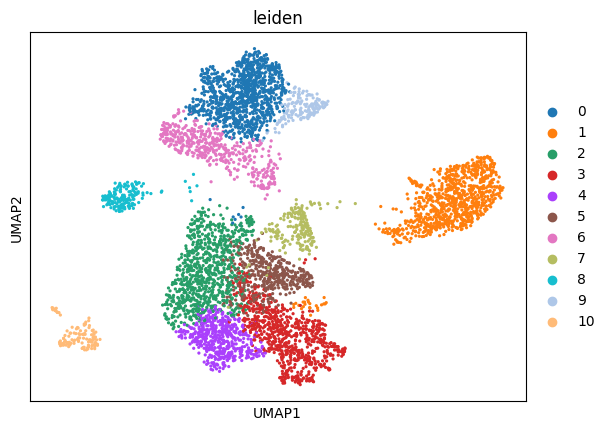

In [25]:
sc.pl.umap(adata, color=['leiden'])

In [17]:
a = get_leiden_graph(FILE, 1)
sc.pl.umap(a, color=['leiden'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


a


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:710: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/utils.py:27: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
 

b


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [131]:
def reclassify(X, N, override=[]):
    X = np.array(X)
    data = np.array(X[X >= 1]).flatten()
    c = Counter(data)
    chunk = len(data) // N
    vals = [[] for _ in range(N)]
    i = 0
    curr = 0
    for k in sorted(c):
        vals[i].append(k)
        curr += c[k]
        if curr >= chunk:
            i += 1
            curr = 0

    vals = [[i[0], i[-1]] for i in vals if i]
    last = vals.pop(-1)
    diff = int(N - len(vals))
    left, right = last[0], last[-1]
    size = 10
    if diff == 0 or diff == 1:
        vals.append([left, right])
    else:
        B = (right - left - diff * size) // ((diff * (diff - 1)) / 2)
        print(left, right)
        for i in range(diff):
            vals.append([left, left + size])
            left += size + 1
            size += B
        if left < right:
            vals.append([left + 1, right])
    # for k in range(left, right, (right - 
    
    # vals = [[i[0], i[-1]] for i in vals if i]
    print(vals)
    # body = 1
    # while body in c:
    #     body += 1
    
    # chunk = (body + 1) // N + 1
    # vals = [[] for _ in range(N)]
    # i = 0
    # curr = 0
    # for k in range(1, body + 1):
    #     vals[i].append(k)
    #     if len(vals[i]) >= chunk:
    #         i += 1
    # vals.append([body + 1, max(c) + 1])
    if override:
        vals = override
    # print(vals)
    for val, chunk_boundaries in enumerate(vals): # tqdm.tqdm(enumerate(vals)):
        if len(chunk_boundaries) == 0:
            continue

        l, r = chunk_boundaries[0], chunk_boundaries[-1]
        v = 1 if val == 0 else r # (l + r) // 2
        # print("chunking", l, r, val + 1)
        X = np.where((l <= X) & (X <= r), v, X)
    return X
# reclassify(sc.read_10x_h5(FILE).X.todense(), 20)

In [132]:
adatas = {}
for n in tqdm.trange(1, 127 + 1):
    adatas[n] = ad.AnnData(reclassify(sc.read_10x_h5(FILE).X.todense(), n))

  0%|                                                   | 0/127 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  1%|▎                                          | 1/127 [00:00<00:25,  4.86it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[[1.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  2%|▋                                          | 2/127 [00:00<00:25,  4.83it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[[1.0, 2.0], [3.0, 2551.0]]
[[1.0, 1.0], [2.0, 4.0], [5.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  2%|█                                          | 3/127 [00:00<00:25,  4.81it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  3%|█▎                                         | 4/127 [00:00<00:26,  4.65it/s]

[[1.0, 1.0], [2.0, 3.0], [4.0, 18.0], [19.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  4%|█▋                                         | 5/127 [00:01<00:26,  4.56it/s]

11.0 2551.0
[[1.0, 1.0], [2.0, 3.0], [4.0, 10.0], [11.0, 21.0], [22.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  5%|██                                         | 6/127 [00:01<00:26,  4.49it/s]

26.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 5.0], [6.0, 25.0], [26.0, 36.0], [37.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  6%|██▎                                        | 7/127 [00:01<00:27,  4.42it/s]

12.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 4.0], [5.0, 11.0], [12.0, 22.0], [23.0, 869.0], [870.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  6%|██▋                                        | 8/127 [00:01<00:28,  4.23it/s]

132.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 4.0], [5.0, 9.0], [10.0, 131.0], [132.0, 142.0], [143.0, 949.0], [950.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  7%|███                                        | 9/127 [00:02<00:28,  4.12it/s]

35.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 4.0], [5.0, 8.0], [9.0, 34.0], [35.0, 45.0], [46.0, 468.0], [469.0, 1303.0], [1304.0, 2550.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  8%|███▎                                      | 10/127 [00:02<00:28,  4.07it/s]

28.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 4.0], [5.0, 8.0], [9.0, 27.0], [28.0, 38.0], [39.0, 296.0], [297.0, 801.0], [802.0, 1553.0], [1554.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  9%|███▋                                      | 11/127 [00:02<00:29,  3.93it/s]

42.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 10.0], [11.0, 41.0], [42.0, 52.0], [53.0, 308.0], [309.0, 809.0], [810.0, 1555.0], [1556.0, 2546.0], [2548.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  9%|███▉                                      | 12/127 [00:02<00:29,  3.84it/s]

27.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 9.0], [10.0, 26.0], [27.0, 37.0], [38.0, 212.0], [213.0, 551.0], [552.0, 1054.0], [1055.0, 1721.0], [1722.0, 2552.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 10%|████▎                                     | 13/127 [00:03<00:30,  3.74it/s]

24.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 9.0], [10.0, 23.0], [24.0, 34.0], [35.0, 162.0], [163.0, 407.0], [408.0, 769.0], [770.0, 1248.0], [1249.0, 1844.0], [1845.0, 2557.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 11%|████▋                                     | 14/127 [00:03<00:30,  3.66it/s]

22.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 9.0], [10.0, 21.0], [22.0, 32.0], [33.0, 130.0], [131.0, 315.0], [316.0, 587.0], [588.0, 946.0], [947.0, 1392.0], [1393.0, 1925.0], [1926.0, 2545.0], [2547.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 12%|████▉                                     | 15/127 [00:03<00:31,  3.55it/s]

94.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 8.0], [9.0, 16.0], [17.0, 93.0], [94.0, 104.0], [105.0, 199.0], [200.0, 378.0], [379.0, 641.0], [642.0, 988.0], [989.0, 1419.0], [1420.0, 1934.0], [1935.0, 2533.0], [2535.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 13%|█████▎                                    | 16/127 [00:04<00:32,  3.42it/s]

57.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 5.0], [6.0, 8.0], [9.0, 15.0], [16.0, 56.0], [57.0, 67.0], [68.0, 144.0], [145.0, 287.0], [288.0, 496.0], [497.0, 771.0], [772.0, 1112.0], [1113.0, 1519.0], [1520.0, 1992.0], [1993.0, 2531.0], [2533.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 13%|█████▌                                    | 17/127 [00:04<00:33,  3.33it/s]

22.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 10.0], [11.0, 21.0], [22.0, 32.0], [33.0, 96.0], [97.0, 213.0], [214.0, 383.0], [384.0, 606.0], [607.0, 882.0], [883.0, 1211.0], [1212.0, 1593.0], [1594.0, 2028.0], [2029.0, 2516.0], [2518.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 14%|█████▉                                    | 18/127 [00:04<00:33,  3.26it/s]

138.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 10.0], [11.0, 20.0], [21.0, 137.0], [138.0, 148.0], [149.0, 210.0], [211.0, 323.0], [324.0, 487.0], [488.0, 702.0], [703.0, 968.0], [969.0, 1285.0], [1286.0, 1653.0], [1654.0, 2072.0], [2073.0, 2542.0], [2544.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 15%|██████▎                                   | 19/127 [00:05<00:33,  3.20it/s]

48.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 9.0], [10.0, 16.0], [17.0, 47.0], [48.0, 58.0], [59.0, 112.0], [113.0, 209.0], [210.0, 349.0], [350.0, 532.0], [533.0, 758.0], [759.0, 1027.0], [1028.0, 1339.0], [1340.0, 1694.0], [1695.0, 2092.0], [2093.0, 2533.0], [2535.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 16%|██████▌                                   | 20/127 [00:05<00:34,  3.12it/s]

44.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 9.0], [10.0, 16.0], [17.0, 43.0], [44.0, 54.0], [55.0, 101.0], [102.0, 184.0], [185.0, 303.0], [304.0, 458.0], [459.0, 649.0], [650.0, 876.0], [877.0, 1139.0], [1140.0, 1438.0], [1439.0, 1773.0], [1774.0, 2144.0], [2145.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 17%|██████▉                                   | 21/127 [00:05<00:34,  3.09it/s]

36.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 9.0], [10.0, 15.0], [16.0, 35.0], [36.0, 46.0], [47.0, 87.0], [88.0, 158.0], [159.0, 259.0], [260.0, 390.0], [391.0, 551.0], [552.0, 742.0], [743.0, 963.0], [964.0, 1214.0], [1215.0, 1495.0], [1496.0, 1806.0], [1807.0, 2147.0], [2148.0, 2518.0], [2520.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 17%|███████▎                                  | 22/127 [00:06<00:34,  3.05it/s]

34.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 9.0], [10.0, 15.0], [16.0, 33.0], [34.0, 44.0], [45.0, 81.0], [82.0, 144.0], [145.0, 233.0], [234.0, 348.0], [349.0, 489.0], [490.0, 656.0], [657.0, 849.0], [850.0, 1068.0], [1069.0, 1313.0], [1314.0, 1584.0], [1585.0, 1881.0], [1882.0, 2204.0], [2205.0, 2553.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 18%|███████▌                                  | 23/127 [00:06<00:34,  3.02it/s]

29.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 6.0], [7.0, 9.0], [10.0, 14.0], [15.0, 28.0], [29.0, 39.0], [40.0, 72.0], [73.0, 127.0], [128.0, 204.0], [205.0, 303.0], [304.0, 424.0], [425.0, 567.0], [568.0, 732.0], [733.0, 919.0], [920.0, 1128.0], [1129.0, 1359.0], [1360.0, 1612.0], [1613.0, 1887.0], [1888.0, 2184.0], [2185.0, 2503.0], [2505.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 19%|███████▉                                  | 24/127 [00:06<00:35,  2.93it/s]

35.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 16.0], [17.0, 34.0], [35.0, 45.0], [46.0, 78.0], [79.0, 133.0], [134.0, 210.0], [211.0, 309.0], [310.0, 430.0], [431.0, 573.0], [574.0, 738.0], [739.0, 925.0], [926.0, 1134.0], [1135.0, 1365.0], [1366.0, 1618.0], [1619.0, 1893.0], [1894.0, 2190.0], [2191.0, 2509.0], [2511.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 20%|████████▎                                 | 25/127 [00:07<00:35,  2.85it/s]

34.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 16.0], [17.0, 33.0], [34.0, 44.0], [45.0, 74.0], [75.0, 123.0], [124.0, 191.0], [192.0, 278.0], [279.0, 384.0], [385.0, 509.0], [510.0, 653.0], [654.0, 816.0], [817.0, 998.0], [999.0, 1199.0], [1200.0, 1419.0], [1420.0, 1658.0], [1659.0, 1916.0], [1917.0, 2193.0], [2194.0, 2489.0], [2491.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 20%|████████▌                                 | 26/127 [00:07<00:36,  2.80it/s]

32.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 16.0], [17.0, 31.0], [32.0, 42.0], [43.0, 70.0], [71.0, 115.0], [116.0, 177.0], [178.0, 256.0], [257.0, 352.0], [353.0, 465.0], [466.0, 595.0], [596.0, 742.0], [743.0, 906.0], [907.0, 1087.0], [1088.0, 1285.0], [1286.0, 1500.0], [1501.0, 1732.0], [1733.0, 1981.0], [1982.0, 2247.0], [2248.0, 2530.0], [2532.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 21%|████████▉                                 | 27/127 [00:07<00:36,  2.74it/s]

138.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 15.0], [16.0, 28.0], [29.0, 137.0], [138.0, 148.0], [149.0, 175.0], [176.0, 218.0], [219.0, 277.0], [278.0, 352.0], [353.0, 443.0], [444.0, 550.0], [551.0, 673.0], [674.0, 812.0], [813.0, 967.0], [968.0, 1138.0], [1139.0, 1325.0], [1326.0, 1528.0], [1529.0, 1747.0], [1748.0, 1982.0], [1983.0, 2233.0], [2234.0, 2500.0], [2502.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 22%|█████████▎                                | 28/127 [00:08<00:37,  2.67it/s]

102.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 15.0], [16.0, 27.0], [28.0, 101.0], [102.0, 112.0], [113.0, 137.0], [138.0, 176.0], [177.0, 229.0], [230.0, 296.0], [297.0, 377.0], [378.0, 472.0], [473.0, 581.0], [582.0, 704.0], [705.0, 841.0], [842.0, 992.0], [993.0, 1157.0], [1158.0, 1336.0], [1337.0, 1529.0], [1530.0, 1736.0], [1737.0, 1957.0], [1958.0, 2192.0], [2193.0, 2441.0], [2443.0, 2551.0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


82.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 15.0], [16.0, 26.0], [27.0, 81.0], [82.0, 92.0], [93.0, 116.0], [117.0, 153.0], [154.0, 203.0], [204.0, 266.0], [267.0, 342.0], [343.0, 431.0], [432.0, 533.0], [534.0, 648.0], [649.0, 776.0], [777.0, 917.0], [918.0, 1071.0], [1072.0, 1238.0], [1239.0, 1418.0], [1419.0, 1611.0], [1612.0, 1817.0], [1818.0, 2036.0], [2037.0, 2268.0], [2269.0, 2513.0], [2515.0, 2551.0]]


 23%|█████████▌                                | 29/127 [00:08<00:37,  2.61it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


77.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 10.0], [11.0, 15.0], [16.0, 26.0], [27.0, 76.0], [77.0, 87.0], [88.0, 109.0], [110.0, 142.0], [143.0, 186.0], [187.0, 241.0], [242.0, 307.0], [308.0, 384.0], [385.0, 472.0], [473.0, 571.0], [572.0, 681.0], [682.0, 802.0], [803.0, 934.0], [935.0, 1077.0], [1078.0, 1231.0], [1232.0, 1396.0], [1397.0, 1572.0], [1573.0, 1759.0], [1760.0, 1957.0], [1958.0, 2166.0], [2167.0, 2386.0], [2388.0, 2551.0]]


 24%|█████████▉                                | 30/127 [00:09<00:37,  2.59it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


45.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 9.0], [10.0, 13.0], [14.0, 21.0], [22.0, 44.0], [45.0, 55.0], [56.0, 76.0], [77.0, 107.0], [108.0, 148.0], [149.0, 199.0], [200.0, 260.0], [261.0, 331.0], [332.0, 412.0], [413.0, 503.0], [504.0, 604.0], [605.0, 715.0], [716.0, 836.0], [837.0, 967.0], [968.0, 1108.0], [1109.0, 1259.0], [1260.0, 1420.0], [1421.0, 1591.0], [1592.0, 1772.0], [1773.0, 1963.0], [1964.0, 2164.0], [2165.0, 2375.0], [2377.0, 2551.0]]


 24%|██████████▎                               | 31/127 [00:09<00:38,  2.51it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


40.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 9.0], [10.0, 13.0], [14.0, 20.0], [21.0, 39.0], [40.0, 50.0], [51.0, 70.0], [71.0, 99.0], [100.0, 137.0], [138.0, 184.0], [185.0, 240.0], [241.0, 305.0], [306.0, 379.0], [380.0, 462.0], [463.0, 554.0], [555.0, 655.0], [656.0, 765.0], [766.0, 884.0], [885.0, 1012.0], [1013.0, 1149.0], [1150.0, 1295.0], [1296.0, 1450.0], [1451.0, 1614.0], [1615.0, 1787.0], [1788.0, 1969.0], [1970.0, 2160.0], [2161.0, 2360.0], [2362.0, 2551.0]]


 25%|██████████▌                               | 32/127 [00:09<00:38,  2.46it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


39.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 7.0], [8.0, 9.0], [10.0, 13.0], [14.0, 20.0], [21.0, 38.0], [39.0, 49.0], [50.0, 69.0], [70.0, 98.0], [99.0, 136.0], [137.0, 183.0], [184.0, 239.0], [240.0, 304.0], [305.0, 378.0], [379.0, 461.0], [462.0, 553.0], [554.0, 654.0], [655.0, 764.0], [765.0, 883.0], [884.0, 1011.0], [1012.0, 1148.0], [1149.0, 1294.0], [1295.0, 1449.0], [1450.0, 1613.0], [1614.0, 1786.0], [1787.0, 1968.0], [1969.0, 2159.0], [2160.0, 2359.0], [2360.0, 2568.0]]


 26%|██████████▉                               | 33/127 [00:10<00:38,  2.42it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


62.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 11.0], [12.0, 16.0], [17.0, 26.0], [27.0, 61.0], [62.0, 72.0], [73.0, 91.0], [92.0, 118.0], [119.0, 153.0], [154.0, 196.0], [197.0, 247.0], [248.0, 306.0], [307.0, 373.0], [374.0, 448.0], [449.0, 531.0], [532.0, 622.0], [623.0, 721.0], [722.0, 828.0], [829.0, 943.0], [944.0, 1066.0], [1067.0, 1197.0], [1198.0, 1336.0], [1337.0, 1483.0], [1484.0, 1638.0], [1639.0, 1801.0], [1802.0, 1972.0], [1973.0, 2151.0], [2152.0, 2338.0], [2340.0, 2551.0]]


 27%|███████████▏                              | 34/127 [00:10<00:39,  2.38it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


60.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 11.0], [12.0, 16.0], [17.0, 26.0], [27.0, 59.0], [60.0, 70.0], [71.0, 89.0], [90.0, 116.0], [117.0, 151.0], [152.0, 194.0], [195.0, 245.0], [246.0, 304.0], [305.0, 371.0], [372.0, 446.0], [447.0, 529.0], [530.0, 620.0], [621.0, 719.0], [720.0, 826.0], [827.0, 941.0], [942.0, 1064.0], [1065.0, 1195.0], [1196.0, 1334.0], [1335.0, 1481.0], [1482.0, 1636.0], [1637.0, 1799.0], [1800.0, 1970.0], [1971.0, 2149.0], [2150.0, 2336.0], [2337.0, 2531.0], [2533.0, 2551.0]]


 28%|███████████▌                              | 35/127 [00:11<00:41,  2.22it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


46.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 11.0], [12.0, 15.0], [16.0, 23.0], [24.0, 45.0], [46.0, 56.0], [57.0, 74.0], [75.0, 99.0], [100.0, 131.0], [132.0, 170.0], [171.0, 216.0], [217.0, 269.0], [270.0, 329.0], [330.0, 396.0], [397.0, 470.0], [471.0, 551.0], [552.0, 639.0], [640.0, 734.0], [735.0, 836.0], [837.0, 945.0], [946.0, 1061.0], [1062.0, 1184.0], [1185.0, 1314.0], [1315.0, 1451.0], [1452.0, 1595.0], [1596.0, 1746.0], [1747.0, 1904.0], [1905.0, 2069.0], [2070.0, 2241.0], [2242.0, 2420.0], [2422.0, 2551.0]]


 28%|███████████▉                              | 36/127 [00:11<00:42,  2.14it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


45.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 11.0], [12.0, 15.0], [16.0, 23.0], [24.0, 44.0], [45.0, 55.0], [56.0, 72.0], [73.0, 95.0], [96.0, 124.0], [125.0, 159.0], [160.0, 200.0], [201.0, 247.0], [248.0, 300.0], [301.0, 359.0], [360.0, 424.0], [425.0, 495.0], [496.0, 572.0], [573.0, 655.0], [656.0, 744.0], [745.0, 839.0], [840.0, 940.0], [941.0, 1047.0], [1048.0, 1160.0], [1161.0, 1279.0], [1280.0, 1404.0], [1405.0, 1535.0], [1536.0, 1672.0], [1673.0, 1815.0], [1816.0, 1964.0], [1965.0, 2119.0], [2120.0, 2280.0], [2282.0, 2551.0]]


 29%|████████████▏                             | 37/127 [00:12<00:41,  2.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


154.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 14.0], [15.0, 21.0], [22.0, 37.0], [38.0, 153.0], [154.0, 164.0], [165.0, 181.0], [182.0, 204.0], [205.0, 233.0], [234.0, 268.0], [269.0, 309.0], [310.0, 356.0], [357.0, 409.0], [410.0, 468.0], [469.0, 533.0], [534.0, 604.0], [605.0, 681.0], [682.0, 764.0], [765.0, 853.0], [854.0, 948.0], [949.0, 1049.0], [1050.0, 1156.0], [1157.0, 1269.0], [1270.0, 1388.0], [1389.0, 1513.0], [1514.0, 1644.0], [1645.0, 1781.0], [1782.0, 1924.0], [1925.0, 2073.0], [2074.0, 2228.0], [2229.0, 2389.0], [2391.0, 2551.0]]


 30%|████████████▌                             | 38/127 [00:12<00:41,  2.16it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


79.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 13.0], [14.0, 19.0], [20.0, 31.0], [32.0, 78.0], [79.0, 89.0], [90.0, 106.0], [107.0, 129.0], [130.0, 158.0], [159.0, 193.0], [194.0, 234.0], [235.0, 281.0], [282.0, 334.0], [335.0, 393.0], [394.0, 458.0], [459.0, 529.0], [530.0, 606.0], [607.0, 689.0], [690.0, 778.0], [779.0, 873.0], [874.0, 974.0], [975.0, 1081.0], [1082.0, 1194.0], [1195.0, 1313.0], [1314.0, 1438.0], [1439.0, 1569.0], [1570.0, 1706.0], [1707.0, 1849.0], [1850.0, 1998.0], [1999.0, 2153.0], [2154.0, 2314.0], [2315.0, 2481.0], [2483.0, 2551.0]]


 31%|████████████▉                             | 39/127 [00:13<00:40,  2.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


60.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 13.0], [14.0, 18.0], [19.0, 28.0], [29.0, 59.0], [60.0, 70.0], [71.0, 86.0], [87.0, 107.0], [108.0, 133.0], [134.0, 164.0], [165.0, 200.0], [201.0, 241.0], [242.0, 287.0], [288.0, 338.0], [339.0, 394.0], [395.0, 455.0], [456.0, 521.0], [522.0, 592.0], [593.0, 668.0], [669.0, 749.0], [750.0, 835.0], [836.0, 926.0], [927.0, 1022.0], [1023.0, 1123.0], [1124.0, 1229.0], [1230.0, 1340.0], [1341.0, 1456.0], [1457.0, 1577.0], [1578.0, 1703.0], [1704.0, 1834.0], [1835.0, 1970.0], [1971.0, 2111.0], [2112.0, 2257.0], [2259.0, 2551.0]]


 31%|█████████████▏                            | 40/127 [00:13<00:40,  2.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


59.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 13.0], [14.0, 18.0], [19.0, 28.0], [29.0, 58.0], [59.0, 69.0], [70.0, 85.0], [86.0, 106.0], [107.0, 132.0], [133.0, 163.0], [164.0, 199.0], [200.0, 240.0], [241.0, 286.0], [287.0, 337.0], [338.0, 393.0], [394.0, 454.0], [455.0, 520.0], [521.0, 591.0], [592.0, 667.0], [668.0, 748.0], [749.0, 834.0], [835.0, 925.0], [926.0, 1021.0], [1022.0, 1122.0], [1123.0, 1228.0], [1229.0, 1339.0], [1340.0, 1455.0], [1456.0, 1576.0], [1577.0, 1702.0], [1703.0, 1833.0], [1834.0, 1969.0], [1970.0, 2110.0], [2111.0, 2256.0], [2257.0, 2407.0], [2409.0, 2551.0]]


 32%|█████████████▌                            | 41/127 [00:14<00:39,  2.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


57.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 13.0], [14.0, 18.0], [19.0, 28.0], [29.0, 56.0], [57.0, 67.0], [68.0, 83.0], [84.0, 104.0], [105.0, 130.0], [131.0, 161.0], [162.0, 197.0], [198.0, 238.0], [239.0, 284.0], [285.0, 335.0], [336.0, 391.0], [392.0, 452.0], [453.0, 518.0], [519.0, 589.0], [590.0, 665.0], [666.0, 746.0], [747.0, 832.0], [833.0, 923.0], [924.0, 1019.0], [1020.0, 1120.0], [1121.0, 1226.0], [1227.0, 1337.0], [1338.0, 1453.0], [1454.0, 1574.0], [1575.0, 1700.0], [1701.0, 1831.0], [1832.0, 1967.0], [1968.0, 2108.0], [2109.0, 2254.0], [2255.0, 2405.0], [2406.0, 2561.0]]


 33%|█████████████▉                            | 42/127 [00:14<00:39,  2.16it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


53.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 13.0], [14.0, 18.0], [19.0, 27.0], [28.0, 52.0], [53.0, 63.0], [64.0, 78.0], [79.0, 97.0], [98.0, 120.0], [121.0, 147.0], [148.0, 178.0], [179.0, 213.0], [214.0, 252.0], [253.0, 295.0], [296.0, 342.0], [343.0, 393.0], [394.0, 448.0], [449.0, 507.0], [508.0, 570.0], [571.0, 637.0], [638.0, 708.0], [709.0, 783.0], [784.0, 862.0], [863.0, 945.0], [946.0, 1032.0], [1033.0, 1123.0], [1124.0, 1218.0], [1219.0, 1317.0], [1318.0, 1420.0], [1421.0, 1527.0], [1528.0, 1638.0], [1639.0, 1753.0], [1754.0, 1872.0], [1873.0, 1995.0], [1996.0, 2122.0], [2123.0, 2253.0], [2255.0, 2551.0]]


 34%|██████████████▏                           | 43/127 [00:15<00:39,  2.13it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


115.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 12.0], [13.0, 16.0], [17.0, 23.0], [24.0, 38.0], [39.0, 114.0], [115.0, 125.0], [126.0, 140.0], [141.0, 159.0], [160.0, 182.0], [183.0, 209.0], [210.0, 240.0], [241.0, 275.0], [276.0, 314.0], [315.0, 357.0], [358.0, 404.0], [405.0, 455.0], [456.0, 510.0], [511.0, 569.0], [570.0, 632.0], [633.0, 699.0], [700.0, 770.0], [771.0, 845.0], [846.0, 924.0], [925.0, 1007.0], [1008.0, 1094.0], [1095.0, 1185.0], [1186.0, 1280.0], [1281.0, 1379.0], [1380.0, 1482.0], [1483.0, 1589.0], [1590.0, 1700.0], [1701.0, 1815.0], [1816.0, 1934.0], [1935.0, 2057.0], [2058.0, 2184.0], [2185.0, 2315.0], [2317.0, 2551.0]]


 35%|██████████████▌                           | 44/127 [00:15<00:39,  2.10it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


110.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 12.0], [13.0, 16.0], [17.0, 23.0], [24.0, 38.0], [39.0, 109.0], [110.0, 120.0], [121.0, 135.0], [136.0, 154.0], [155.0, 177.0], [178.0, 204.0], [205.0, 235.0], [236.0, 270.0], [271.0, 309.0], [310.0, 352.0], [353.0, 399.0], [400.0, 450.0], [451.0, 505.0], [506.0, 564.0], [565.0, 627.0], [628.0, 694.0], [695.0, 765.0], [766.0, 840.0], [841.0, 919.0], [920.0, 1002.0], [1003.0, 1089.0], [1090.0, 1180.0], [1181.0, 1275.0], [1276.0, 1374.0], [1375.0, 1477.0], [1478.0, 1584.0], [1585.0, 1695.0], [1696.0, 1810.0], [1811.0, 1929.0], [1930.0, 2052.0], [2053.0, 2179.0], [2180.0, 2310.0], [2311.0, 2445.0], [2447.0, 2551.0]]


 35%|██████████████▉                           | 45/127 [00:16<00:39,  2.09it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


97.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 12.0], [13.0, 16.0], [17.0, 23.0], [24.0, 37.0], [38.0, 96.0], [97.0, 107.0], [108.0, 122.0], [123.0, 141.0], [142.0, 164.0], [165.0, 191.0], [192.0, 222.0], [223.0, 257.0], [258.0, 296.0], [297.0, 339.0], [340.0, 386.0], [387.0, 437.0], [438.0, 492.0], [493.0, 551.0], [552.0, 614.0], [615.0, 681.0], [682.0, 752.0], [753.0, 827.0], [828.0, 906.0], [907.0, 989.0], [990.0, 1076.0], [1077.0, 1167.0], [1168.0, 1262.0], [1263.0, 1361.0], [1362.0, 1464.0], [1465.0, 1571.0], [1572.0, 1682.0], [1683.0, 1797.0], [1798.0, 1916.0], [1917.0, 2039.0], [2040.0, 2166.0], [2167.0, 2297.0], [2298.0, 2432.0], [2433.0, 2571.0]]


 36%|███████████████▏                          | 46/127 [00:16<00:39,  2.06it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


52.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 28.0], [29.0, 51.0], [52.0, 62.0], [63.0, 76.0], [77.0, 93.0], [94.0, 113.0], [114.0, 136.0], [137.0, 162.0], [163.0, 191.0], [192.0, 223.0], [224.0, 258.0], [259.0, 296.0], [297.0, 337.0], [338.0, 381.0], [382.0, 428.0], [429.0, 478.0], [479.0, 531.0], [532.0, 587.0], [588.0, 646.0], [647.0, 708.0], [709.0, 773.0], [774.0, 841.0], [842.0, 912.0], [913.0, 986.0], [987.0, 1063.0], [1064.0, 1143.0], [1144.0, 1226.0], [1227.0, 1312.0], [1313.0, 1401.0], [1402.0, 1493.0], [1494.0, 1588.0], [1589.0, 1686.0], [1687.0, 1787.0], [1788.0, 1891.0], [1892.0, 1998.0], [1999.0, 2108.0], [2110.0, 2551.0]]


 37%|███████████████▌                          | 47/127 [00:17<00:39,  2.02it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


446.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 28.0], [29.0, 50.0], [51.0, 445.0], [446.0, 456.0], [457.0, 470.0], [471.0, 487.0], [488.0, 507.0], [508.0, 530.0], [531.0, 556.0], [557.0, 585.0], [586.0, 617.0], [618.0, 652.0], [653.0, 690.0], [691.0, 731.0], [732.0, 775.0], [776.0, 822.0], [823.0, 872.0], [873.0, 925.0], [926.0, 981.0], [982.0, 1040.0], [1041.0, 1102.0], [1103.0, 1167.0], [1168.0, 1235.0], [1236.0, 1306.0], [1307.0, 1380.0], [1381.0, 1457.0], [1458.0, 1537.0], [1538.0, 1620.0], [1621.0, 1706.0], [1707.0, 1795.0], [1796.0, 1887.0], [1888.0, 1982.0], [1983.0, 2080.0], [2081.0, 2181.0], [2182.0, 2285.0], [2286.0, 2392.0], [2393.0, 2502.0], [2504.0, 2551.0]]


 38%|███████████████▊                          | 48/127 [00:17<00:39,  1.99it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


341.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 28.0], [29.0, 50.0], [51.0, 340.0], [341.0, 351.0], [352.0, 365.0], [366.0, 382.0], [383.0, 402.0], [403.0, 425.0], [426.0, 451.0], [452.0, 480.0], [481.0, 512.0], [513.0, 547.0], [548.0, 585.0], [586.0, 626.0], [627.0, 670.0], [671.0, 717.0], [718.0, 767.0], [768.0, 820.0], [821.0, 876.0], [877.0, 935.0], [936.0, 997.0], [998.0, 1062.0], [1063.0, 1130.0], [1131.0, 1201.0], [1202.0, 1275.0], [1276.0, 1352.0], [1353.0, 1432.0], [1433.0, 1515.0], [1516.0, 1601.0], [1602.0, 1690.0], [1691.0, 1782.0], [1783.0, 1877.0], [1878.0, 1975.0], [1976.0, 2076.0], [2077.0, 2180.0], [2181.0, 2287.0], [2288.0, 2397.0], [2398.0, 2510.0], [2512.0, 2551.0]]


 39%|████████████████▏                         | 49/127 [00:18<00:39,  1.96it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


171.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 27.0], [28.0, 46.0], [47.0, 170.0], [171.0, 181.0], [182.0, 195.0], [196.0, 212.0], [213.0, 232.0], [233.0, 255.0], [256.0, 281.0], [282.0, 310.0], [311.0, 342.0], [343.0, 377.0], [378.0, 415.0], [416.0, 456.0], [457.0, 500.0], [501.0, 547.0], [548.0, 597.0], [598.0, 650.0], [651.0, 706.0], [707.0, 765.0], [766.0, 827.0], [828.0, 892.0], [893.0, 960.0], [961.0, 1031.0], [1032.0, 1105.0], [1106.0, 1182.0], [1183.0, 1262.0], [1263.0, 1345.0], [1346.0, 1431.0], [1432.0, 1520.0], [1521.0, 1612.0], [1613.0, 1707.0], [1708.0, 1805.0], [1806.0, 1906.0], [1907.0, 2010.0], [2011.0, 2117.0], [2118.0, 2227.0], [2228.0, 2340.0], [2341.0, 2456.0], [2458.0, 2551.0]]


 39%|████████████████▌                         | 50/127 [00:18<00:40,  1.91it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


148.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 27.0], [28.0, 45.0], [46.0, 147.0], [148.0, 158.0], [159.0, 172.0], [173.0, 189.0], [190.0, 209.0], [210.0, 232.0], [233.0, 258.0], [259.0, 287.0], [288.0, 319.0], [320.0, 354.0], [355.0, 392.0], [393.0, 433.0], [434.0, 477.0], [478.0, 524.0], [525.0, 574.0], [575.0, 627.0], [628.0, 683.0], [684.0, 742.0], [743.0, 804.0], [805.0, 869.0], [870.0, 937.0], [938.0, 1008.0], [1009.0, 1082.0], [1083.0, 1159.0], [1160.0, 1239.0], [1240.0, 1322.0], [1323.0, 1408.0], [1409.0, 1497.0], [1498.0, 1589.0], [1590.0, 1684.0], [1685.0, 1782.0], [1783.0, 1883.0], [1884.0, 1987.0], [1988.0, 2094.0], [2095.0, 2204.0], [2205.0, 2317.0], [2318.0, 2433.0], [2434.0, 2552.0]]


 40%|████████████████▊                         | 51/127 [00:19<00:38,  1.97it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


141.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 19.0], [20.0, 27.0], [28.0, 45.0], [46.0, 140.0], [141.0, 151.0], [152.0, 164.0], [165.0, 179.0], [180.0, 196.0], [197.0, 215.0], [216.0, 236.0], [237.0, 259.0], [260.0, 284.0], [285.0, 311.0], [312.0, 340.0], [341.0, 371.0], [372.0, 404.0], [405.0, 439.0], [440.0, 476.0], [477.0, 515.0], [516.0, 556.0], [557.0, 599.0], [600.0, 644.0], [645.0, 691.0], [692.0, 740.0], [741.0, 791.0], [792.0, 844.0], [845.0, 899.0], [900.0, 956.0], [957.0, 1015.0], [1016.0, 1076.0], [1077.0, 1139.0], [1140.0, 1204.0], [1205.0, 1271.0], [1272.0, 1340.0], [1341.0, 1411.0], [1412.0, 1484.0], [1485.0, 1559.0], [1560.0, 1636.0], [1637.0, 1715.0], [1716.0, 1796.0], [1797.0, 1879.0], [1880.0, 1964.0], [1966.0, 2551.0]]


 41%|█████████████████▏                        | 52/127 [00:19<00:37,  2.02it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


90.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 18.0], [19.0, 25.0], [26.0, 39.0], [40.0, 89.0], [90.0, 100.0], [101.0, 113.0], [114.0, 128.0], [129.0, 145.0], [146.0, 164.0], [165.0, 185.0], [186.0, 208.0], [209.0, 233.0], [234.0, 260.0], [261.0, 289.0], [290.0, 320.0], [321.0, 353.0], [354.0, 388.0], [389.0, 425.0], [426.0, 464.0], [465.0, 505.0], [506.0, 548.0], [549.0, 593.0], [594.0, 640.0], [641.0, 689.0], [690.0, 740.0], [741.0, 793.0], [794.0, 848.0], [849.0, 905.0], [906.0, 964.0], [965.0, 1025.0], [1026.0, 1088.0], [1089.0, 1153.0], [1154.0, 1220.0], [1221.0, 1289.0], [1290.0, 1360.0], [1361.0, 1433.0], [1434.0, 1508.0], [1509.0, 1585.0], [1586.0, 1664.0], [1665.0, 1745.0], [1746.0, 1828.0], [1829.0, 1913.0], [1914.0, 2000.0], [2002.0, 2551.0]]


 42%|█████████████████▌                        | 53/127 [00:20<00:36,  2.02it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


88.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 18.0], [19.0, 25.0], [26.0, 39.0], [40.0, 87.0], [88.0, 98.0], [99.0, 111.0], [112.0, 126.0], [127.0, 143.0], [144.0, 162.0], [163.0, 183.0], [184.0, 206.0], [207.0, 231.0], [232.0, 258.0], [259.0, 287.0], [288.0, 318.0], [319.0, 351.0], [352.0, 386.0], [387.0, 423.0], [424.0, 462.0], [463.0, 503.0], [504.0, 546.0], [547.0, 591.0], [592.0, 638.0], [639.0, 687.0], [688.0, 738.0], [739.0, 791.0], [792.0, 846.0], [847.0, 903.0], [904.0, 962.0], [963.0, 1023.0], [1024.0, 1086.0], [1087.0, 1151.0], [1152.0, 1218.0], [1219.0, 1287.0], [1288.0, 1358.0], [1359.0, 1431.0], [1432.0, 1506.0], [1507.0, 1583.0], [1584.0, 1662.0], [1663.0, 1743.0], [1744.0, 1826.0], [1827.0, 1911.0], [1912.0, 1998.0], [1999.0, 2087.0], [2089.0, 2551.0]]


 43%|█████████████████▊                        | 54/127 [00:20<00:36,  1.98it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


81.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 9.0], [10.0, 11.0], [12.0, 14.0], [15.0, 18.0], [19.0, 25.0], [26.0, 38.0], [39.0, 80.0], [81.0, 91.0], [92.0, 104.0], [105.0, 119.0], [120.0, 136.0], [137.0, 155.0], [156.0, 176.0], [177.0, 199.0], [200.0, 224.0], [225.0, 251.0], [252.0, 280.0], [281.0, 311.0], [312.0, 344.0], [345.0, 379.0], [380.0, 416.0], [417.0, 455.0], [456.0, 496.0], [497.0, 539.0], [540.0, 584.0], [585.0, 631.0], [632.0, 680.0], [681.0, 731.0], [732.0, 784.0], [785.0, 839.0], [840.0, 896.0], [897.0, 955.0], [956.0, 1016.0], [1017.0, 1079.0], [1080.0, 1144.0], [1145.0, 1211.0], [1212.0, 1280.0], [1281.0, 1351.0], [1352.0, 1424.0], [1425.0, 1499.0], [1500.0, 1576.0], [1577.0, 1655.0], [1656.0, 1736.0], [1737.0, 1819.0], [1820.0, 1904.0], [1905.0, 1991.0], [1992.0, 2080.0], [2081.0, 2171.0], [2173.0, 2551.0]]


 43%|██████████████████▏                       | 55/127 [00:21<00:37,  1.94it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


121.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 20.0], [21.0, 28.0], [29.0, 45.0], [46.0, 120.0], [121.0, 131.0], [132.0, 144.0], [145.0, 159.0], [160.0, 176.0], [177.0, 195.0], [196.0, 216.0], [217.0, 239.0], [240.0, 264.0], [265.0, 291.0], [292.0, 320.0], [321.0, 351.0], [352.0, 384.0], [385.0, 419.0], [420.0, 456.0], [457.0, 495.0], [496.0, 536.0], [537.0, 579.0], [580.0, 624.0], [625.0, 671.0], [672.0, 720.0], [721.0, 771.0], [772.0, 824.0], [825.0, 879.0], [880.0, 936.0], [937.0, 995.0], [996.0, 1056.0], [1057.0, 1119.0], [1120.0, 1184.0], [1185.0, 1251.0], [1252.0, 1320.0], [1321.0, 1391.0], [1392.0, 1464.0], [1465.0, 1539.0], [1540.0, 1616.0], [1617.0, 1695.0], [1696.0, 1776.0], [1777.0, 1859.0], [1860.0, 1944.0], [1945.0, 2031.0], [2032.0, 2120.0], [2121.0, 2211.0], [2213.0, 2551.0]]


 44%|██████████████████▌                       | 56/127 [00:21<00:37,  1.88it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


118.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 20.0], [21.0, 28.0], [29.0, 45.0], [46.0, 117.0], [118.0, 128.0], [129.0, 141.0], [142.0, 156.0], [157.0, 173.0], [174.0, 192.0], [193.0, 213.0], [214.0, 236.0], [237.0, 261.0], [262.0, 288.0], [289.0, 317.0], [318.0, 348.0], [349.0, 381.0], [382.0, 416.0], [417.0, 453.0], [454.0, 492.0], [493.0, 533.0], [534.0, 576.0], [577.0, 621.0], [622.0, 668.0], [669.0, 717.0], [718.0, 768.0], [769.0, 821.0], [822.0, 876.0], [877.0, 933.0], [934.0, 992.0], [993.0, 1053.0], [1054.0, 1116.0], [1117.0, 1181.0], [1182.0, 1248.0], [1249.0, 1317.0], [1318.0, 1388.0], [1389.0, 1461.0], [1462.0, 1536.0], [1537.0, 1613.0], [1614.0, 1692.0], [1693.0, 1773.0], [1774.0, 1856.0], [1857.0, 1941.0], [1942.0, 2028.0], [2029.0, 2117.0], [2118.0, 2208.0], [2209.0, 2301.0], [2303.0, 2551.0]]


 45%|██████████████████▊                       | 57/127 [00:22<00:38,  1.80it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


108.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 20.0], [21.0, 28.0], [29.0, 44.0], [45.0, 107.0], [108.0, 118.0], [119.0, 131.0], [132.0, 146.0], [147.0, 163.0], [164.0, 182.0], [183.0, 203.0], [204.0, 226.0], [227.0, 251.0], [252.0, 278.0], [279.0, 307.0], [308.0, 338.0], [339.0, 371.0], [372.0, 406.0], [407.0, 443.0], [444.0, 482.0], [483.0, 523.0], [524.0, 566.0], [567.0, 611.0], [612.0, 658.0], [659.0, 707.0], [708.0, 758.0], [759.0, 811.0], [812.0, 866.0], [867.0, 923.0], [924.0, 982.0], [983.0, 1043.0], [1044.0, 1106.0], [1107.0, 1171.0], [1172.0, 1238.0], [1239.0, 1307.0], [1308.0, 1378.0], [1379.0, 1451.0], [1452.0, 1526.0], [1527.0, 1603.0], [1604.0, 1682.0], [1683.0, 1763.0], [1764.0, 1846.0], [1847.0, 1931.0], [1932.0, 2018.0], [2019.0, 2107.0], [2108.0, 2198.0], [2199.0, 2291.0], [2292.0, 2386.0], [2388.0, 2551.0]]


 46%|███████████████████▏                      | 58/127 [00:22<00:39,  1.76it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


105.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 20.0], [21.0, 28.0], [29.0, 44.0], [45.0, 104.0], [105.0, 115.0], [116.0, 128.0], [129.0, 143.0], [144.0, 160.0], [161.0, 179.0], [180.0, 200.0], [201.0, 223.0], [224.0, 248.0], [249.0, 275.0], [276.0, 304.0], [305.0, 335.0], [336.0, 368.0], [369.0, 403.0], [404.0, 440.0], [441.0, 479.0], [480.0, 520.0], [521.0, 563.0], [564.0, 608.0], [609.0, 655.0], [656.0, 704.0], [705.0, 755.0], [756.0, 808.0], [809.0, 863.0], [864.0, 920.0], [921.0, 979.0], [980.0, 1040.0], [1041.0, 1103.0], [1104.0, 1168.0], [1169.0, 1235.0], [1236.0, 1304.0], [1305.0, 1375.0], [1376.0, 1448.0], [1449.0, 1523.0], [1524.0, 1600.0], [1601.0, 1679.0], [1680.0, 1760.0], [1761.0, 1843.0], [1844.0, 1928.0], [1929.0, 2015.0], [2016.0, 2104.0], [2105.0, 2195.0], [2196.0, 2288.0], [2289.0, 2383.0], [2384.0, 2480.0], [2482.0, 2551.0]]


 46%|███████████████████▌                      | 59/127 [00:23<00:38,  1.77it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


78.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 26.0], [27.0, 39.0], [40.0, 77.0], [78.0, 88.0], [89.0, 101.0], [102.0, 116.0], [117.0, 133.0], [134.0, 152.0], [153.0, 173.0], [174.0, 196.0], [197.0, 221.0], [222.0, 248.0], [249.0, 277.0], [278.0, 308.0], [309.0, 341.0], [342.0, 376.0], [377.0, 413.0], [414.0, 452.0], [453.0, 493.0], [494.0, 536.0], [537.0, 581.0], [582.0, 628.0], [629.0, 677.0], [678.0, 728.0], [729.0, 781.0], [782.0, 836.0], [837.0, 893.0], [894.0, 952.0], [953.0, 1013.0], [1014.0, 1076.0], [1077.0, 1141.0], [1142.0, 1208.0], [1209.0, 1277.0], [1278.0, 1348.0], [1349.0, 1421.0], [1422.0, 1496.0], [1497.0, 1573.0], [1574.0, 1652.0], [1653.0, 1733.0], [1734.0, 1816.0], [1817.0, 1901.0], [1902.0, 1988.0], [1989.0, 2077.0], [2078.0, 2168.0], [2169.0, 2261.0], [2262.0, 2356.0], [2357.0, 2453.0], [2454.0, 2552.0]]


 47%|███████████████████▊                      | 60/127 [00:24<00:37,  1.78it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


77.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 26.0], [27.0, 39.0], [40.0, 76.0], [77.0, 87.0], [88.0, 99.0], [100.0, 112.0], [113.0, 126.0], [127.0, 141.0], [142.0, 157.0], [158.0, 174.0], [175.0, 192.0], [193.0, 211.0], [212.0, 231.0], [232.0, 252.0], [253.0, 274.0], [275.0, 297.0], [298.0, 321.0], [322.0, 346.0], [347.0, 372.0], [373.0, 399.0], [400.0, 427.0], [428.0, 456.0], [457.0, 486.0], [487.0, 517.0], [518.0, 549.0], [550.0, 582.0], [583.0, 616.0], [617.0, 651.0], [652.0, 687.0], [688.0, 724.0], [725.0, 762.0], [763.0, 801.0], [802.0, 841.0], [842.0, 882.0], [883.0, 924.0], [925.0, 967.0], [968.0, 1011.0], [1012.0, 1056.0], [1057.0, 1102.0], [1103.0, 1149.0], [1150.0, 1197.0], [1198.0, 1246.0], [1247.0, 1296.0], [1297.0, 1347.0], [1348.0, 1399.0], [1400.0, 1452.0], [1453.0, 1506.0], [1507.0, 1561.0], [1562.0, 1617.0], [1619.0, 2551.0]]


 48%|████████████████████▏                     | 61/127 [00:24<00:37,  1.76it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


72.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 26.0], [27.0, 38.0], [39.0, 71.0], [72.0, 82.0], [83.0, 94.0], [95.0, 107.0], [108.0, 121.0], [122.0, 136.0], [137.0, 152.0], [153.0, 169.0], [170.0, 187.0], [188.0, 206.0], [207.0, 226.0], [227.0, 247.0], [248.0, 269.0], [270.0, 292.0], [293.0, 316.0], [317.0, 341.0], [342.0, 367.0], [368.0, 394.0], [395.0, 422.0], [423.0, 451.0], [452.0, 481.0], [482.0, 512.0], [513.0, 544.0], [545.0, 577.0], [578.0, 611.0], [612.0, 646.0], [647.0, 682.0], [683.0, 719.0], [720.0, 757.0], [758.0, 796.0], [797.0, 836.0], [837.0, 877.0], [878.0, 919.0], [920.0, 962.0], [963.0, 1006.0], [1007.0, 1051.0], [1052.0, 1097.0], [1098.0, 1144.0], [1145.0, 1192.0], [1193.0, 1241.0], [1242.0, 1291.0], [1292.0, 1342.0], [1343.0, 1394.0], [1395.0, 1447.0], [1448.0, 1501.0], [1502.0, 1556.0], [1557.0, 1612.0], [1613.0, 1669.0], [1671.0, 2551.0]]


 49%|████████████████████▌                     | 62/127 [00:25<00:37,  1.71it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


64.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 36.0], [37.0, 63.0], [64.0, 74.0], [75.0, 86.0], [87.0, 99.0], [100.0, 113.0], [114.0, 128.0], [129.0, 144.0], [145.0, 161.0], [162.0, 179.0], [180.0, 198.0], [199.0, 218.0], [219.0, 239.0], [240.0, 261.0], [262.0, 284.0], [285.0, 308.0], [309.0, 333.0], [334.0, 359.0], [360.0, 386.0], [387.0, 414.0], [415.0, 443.0], [444.0, 473.0], [474.0, 504.0], [505.0, 536.0], [537.0, 569.0], [570.0, 603.0], [604.0, 638.0], [639.0, 674.0], [675.0, 711.0], [712.0, 749.0], [750.0, 788.0], [789.0, 828.0], [829.0, 869.0], [870.0, 911.0], [912.0, 954.0], [955.0, 998.0], [999.0, 1043.0], [1044.0, 1089.0], [1090.0, 1136.0], [1137.0, 1184.0], [1185.0, 1233.0], [1234.0, 1283.0], [1284.0, 1334.0], [1335.0, 1386.0], [1387.0, 1439.0], [1440.0, 1493.0], [1494.0, 1548.0], [1549.0, 1604.0], [1605.0, 1661.0], [1662.0, 1719.0], [1721

 50%|████████████████████▊                     | 63/127 [00:25<00:37,  1.70it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


670.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 36.0], [37.0, 63.0], [64.0, 669.0], [670.0, 680.0], [681.0, 692.0], [693.0, 705.0], [706.0, 719.0], [720.0, 734.0], [735.0, 750.0], [751.0, 767.0], [768.0, 785.0], [786.0, 804.0], [805.0, 824.0], [825.0, 845.0], [846.0, 867.0], [868.0, 890.0], [891.0, 914.0], [915.0, 939.0], [940.0, 965.0], [966.0, 992.0], [993.0, 1020.0], [1021.0, 1049.0], [1050.0, 1079.0], [1080.0, 1110.0], [1111.0, 1142.0], [1143.0, 1175.0], [1176.0, 1209.0], [1210.0, 1244.0], [1245.0, 1280.0], [1281.0, 1317.0], [1318.0, 1355.0], [1356.0, 1394.0], [1395.0, 1434.0], [1435.0, 1475.0], [1476.0, 1517.0], [1518.0, 1560.0], [1561.0, 1604.0], [1605.0, 1649.0], [1650.0, 1695.0], [1696.0, 1742.0], [1743.0, 1790.0], [1791.0, 1839.0], [1840.0, 1889.0], [1890.0, 1940.0], [1941.0, 1992.0], [1993.0, 2045.0], [2046.0, 2099.0], [2100.0, 2154.0], [21

 50%|█████████████████████▏                    | 64/127 [00:26<00:36,  1.71it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


371.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 36.0], [37.0, 62.0], [63.0, 370.0], [371.0, 381.0], [382.0, 393.0], [394.0, 406.0], [407.0, 420.0], [421.0, 435.0], [436.0, 451.0], [452.0, 468.0], [469.0, 486.0], [487.0, 505.0], [506.0, 525.0], [526.0, 546.0], [547.0, 568.0], [569.0, 591.0], [592.0, 615.0], [616.0, 640.0], [641.0, 666.0], [667.0, 693.0], [694.0, 721.0], [722.0, 750.0], [751.0, 780.0], [781.0, 811.0], [812.0, 843.0], [844.0, 876.0], [877.0, 910.0], [911.0, 945.0], [946.0, 981.0], [982.0, 1018.0], [1019.0, 1056.0], [1057.0, 1095.0], [1096.0, 1135.0], [1136.0, 1176.0], [1177.0, 1218.0], [1219.0, 1261.0], [1262.0, 1305.0], [1306.0, 1350.0], [1351.0, 1396.0], [1397.0, 1443.0], [1444.0, 1491.0], [1492.0, 1540.0], [1541.0, 1590.0], [1591.0, 1641.0], [1642.0, 1693.0], [1694.0, 1746.0], [1747.0, 1800.0], [1801.0, 1855.0], [1856.0, 1911.0], [19

 51%|█████████████████████▍                    | 65/127 [00:27<00:36,  1.69it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


233.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 35.0], [36.0, 59.0], [60.0, 232.0], [233.0, 243.0], [244.0, 255.0], [256.0, 268.0], [269.0, 282.0], [283.0, 297.0], [298.0, 313.0], [314.0, 330.0], [331.0, 348.0], [349.0, 367.0], [368.0, 387.0], [388.0, 408.0], [409.0, 430.0], [431.0, 453.0], [454.0, 477.0], [478.0, 502.0], [503.0, 528.0], [529.0, 555.0], [556.0, 583.0], [584.0, 612.0], [613.0, 642.0], [643.0, 673.0], [674.0, 705.0], [706.0, 738.0], [739.0, 772.0], [773.0, 807.0], [808.0, 843.0], [844.0, 880.0], [881.0, 918.0], [919.0, 957.0], [958.0, 997.0], [998.0, 1038.0], [1039.0, 1080.0], [1081.0, 1123.0], [1124.0, 1167.0], [1168.0, 1212.0], [1213.0, 1258.0], [1259.0, 1305.0], [1306.0, 1353.0], [1354.0, 1402.0], [1403.0, 1452.0], [1453.0, 1503.0], [1504.0, 1555.0], [1556.0, 1608.0], [1609.0, 1662.0], [1663.0, 1717.0], [1718.0, 1773.0], [1774.0, 18

 52%|█████████████████████▊                    | 66/127 [00:27<00:36,  1.69it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


201.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 35.0], [36.0, 58.0], [59.0, 200.0], [201.0, 211.0], [212.0, 223.0], [224.0, 236.0], [237.0, 250.0], [251.0, 265.0], [266.0, 281.0], [282.0, 298.0], [299.0, 316.0], [317.0, 335.0], [336.0, 355.0], [356.0, 376.0], [377.0, 398.0], [399.0, 421.0], [422.0, 445.0], [446.0, 470.0], [471.0, 496.0], [497.0, 523.0], [524.0, 551.0], [552.0, 580.0], [581.0, 610.0], [611.0, 641.0], [642.0, 673.0], [674.0, 706.0], [707.0, 740.0], [741.0, 775.0], [776.0, 811.0], [812.0, 848.0], [849.0, 886.0], [887.0, 925.0], [926.0, 965.0], [966.0, 1006.0], [1007.0, 1048.0], [1049.0, 1091.0], [1092.0, 1135.0], [1136.0, 1180.0], [1181.0, 1226.0], [1227.0, 1273.0], [1274.0, 1321.0], [1322.0, 1370.0], [1371.0, 1420.0], [1421.0, 1471.0], [1472.0, 1523.0], [1524.0, 1576.0], [1577.0, 1630.0], [1631.0, 1685.0], [1686.0, 1741.0], [1742.0, 17

 53%|██████████████████████▏                   | 67/127 [00:28<00:35,  1.67it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


180.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 15.0], [16.0, 19.0], [20.0, 25.0], [26.0, 35.0], [36.0, 57.0], [58.0, 179.0], [180.0, 190.0], [191.0, 202.0], [203.0, 215.0], [216.0, 229.0], [230.0, 244.0], [245.0, 260.0], [261.0, 277.0], [278.0, 295.0], [296.0, 314.0], [315.0, 334.0], [335.0, 355.0], [356.0, 377.0], [378.0, 400.0], [401.0, 424.0], [425.0, 449.0], [450.0, 475.0], [476.0, 502.0], [503.0, 530.0], [531.0, 559.0], [560.0, 589.0], [590.0, 620.0], [621.0, 652.0], [653.0, 685.0], [686.0, 719.0], [720.0, 754.0], [755.0, 790.0], [791.0, 827.0], [828.0, 865.0], [866.0, 904.0], [905.0, 944.0], [945.0, 985.0], [986.0, 1027.0], [1028.0, 1070.0], [1071.0, 1114.0], [1115.0, 1159.0], [1160.0, 1205.0], [1206.0, 1252.0], [1253.0, 1300.0], [1301.0, 1349.0], [1350.0, 1399.0], [1400.0, 1450.0], [1451.0, 1502.0], [1503.0, 1555.0], [1556.0, 1609.0], [1610.0, 1664.0], [1665.0, 1720.0], [1721.0, 1777

 54%|██████████████████████▍                   | 68/127 [00:28<00:35,  1.65it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


260.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 37.0], [38.0, 62.0], [63.0, 259.0], [260.0, 270.0], [271.0, 282.0], [283.0, 295.0], [296.0, 309.0], [310.0, 324.0], [325.0, 340.0], [341.0, 357.0], [358.0, 375.0], [376.0, 394.0], [395.0, 414.0], [415.0, 435.0], [436.0, 457.0], [458.0, 480.0], [481.0, 504.0], [505.0, 529.0], [530.0, 555.0], [556.0, 582.0], [583.0, 610.0], [611.0, 639.0], [640.0, 669.0], [670.0, 700.0], [701.0, 732.0], [733.0, 765.0], [766.0, 799.0], [800.0, 834.0], [835.0, 870.0], [871.0, 907.0], [908.0, 945.0], [946.0, 984.0], [985.0, 1024.0], [1025.0, 1065.0], [1066.0, 1107.0], [1108.0, 1150.0], [1151.0, 1194.0], [1195.0, 1239.0], [1240.0, 1285.0], [1286.0, 1332.0], [1333.0, 1380.0], [1381.0, 1429.0], [1430.0, 1479.0], [1480.0, 1530.0], [1531.0, 1582.0], [1583.0, 1635.0], [1636.0, 1689.0], [1690.0, 1744.0], [1745.0, 1800.

 54%|██████████████████████▊                   | 69/127 [00:29<00:35,  1.62it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


245.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 37.0], [38.0, 62.0], [63.0, 244.0], [245.0, 255.0], [256.0, 267.0], [268.0, 280.0], [281.0, 294.0], [295.0, 309.0], [310.0, 325.0], [326.0, 342.0], [343.0, 360.0], [361.0, 379.0], [380.0, 399.0], [400.0, 420.0], [421.0, 442.0], [443.0, 465.0], [466.0, 489.0], [490.0, 514.0], [515.0, 540.0], [541.0, 567.0], [568.0, 595.0], [596.0, 624.0], [625.0, 654.0], [655.0, 685.0], [686.0, 717.0], [718.0, 750.0], [751.0, 784.0], [785.0, 819.0], [820.0, 855.0], [856.0, 892.0], [893.0, 930.0], [931.0, 969.0], [970.0, 1009.0], [1010.0, 1050.0], [1051.0, 1092.0], [1093.0, 1135.0], [1136.0, 1179.0], [1180.0, 1224.0], [1225.0, 1270.0], [1271.0, 1317.0], [1318.0, 1365.0], [1366.0, 1414.0], [1415.0, 1464.0], [1465.0, 1515.0], [1516.0, 1567.0], [1568.0, 1620.0], [1621.0, 1674.0], [1675.0, 1729.0], [1730.0, 1785.

 55%|███████████████████████▏                  | 70/127 [00:30<00:35,  1.59it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


185.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 36.0], [37.0, 59.0], [60.0, 184.0], [185.0, 195.0], [196.0, 207.0], [208.0, 220.0], [221.0, 234.0], [235.0, 249.0], [250.0, 265.0], [266.0, 282.0], [283.0, 300.0], [301.0, 319.0], [320.0, 339.0], [340.0, 360.0], [361.0, 382.0], [383.0, 405.0], [406.0, 429.0], [430.0, 454.0], [455.0, 480.0], [481.0, 507.0], [508.0, 535.0], [536.0, 564.0], [565.0, 594.0], [595.0, 625.0], [626.0, 657.0], [658.0, 690.0], [691.0, 724.0], [725.0, 759.0], [760.0, 795.0], [796.0, 832.0], [833.0, 870.0], [871.0, 909.0], [910.0, 949.0], [950.0, 990.0], [991.0, 1032.0], [1033.0, 1075.0], [1076.0, 1119.0], [1120.0, 1164.0], [1165.0, 1210.0], [1211.0, 1257.0], [1258.0, 1305.0], [1306.0, 1354.0], [1355.0, 1404.0], [1405.0, 1455.0], [1456.0, 1507.0], [1508.0, 1560.0], [1561.0, 1614.0], [1615.0, 1669.0], [1670.0, 1725.0], 

 56%|███████████████████████▍                  | 71/127 [00:30<00:35,  1.58it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


168.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 36.0], [37.0, 58.0], [59.0, 167.0], [168.0, 178.0], [179.0, 190.0], [191.0, 203.0], [204.0, 217.0], [218.0, 232.0], [233.0, 248.0], [249.0, 265.0], [266.0, 283.0], [284.0, 302.0], [303.0, 322.0], [323.0, 343.0], [344.0, 365.0], [366.0, 388.0], [389.0, 412.0], [413.0, 437.0], [438.0, 463.0], [464.0, 490.0], [491.0, 518.0], [519.0, 547.0], [548.0, 577.0], [578.0, 608.0], [609.0, 640.0], [641.0, 673.0], [674.0, 707.0], [708.0, 742.0], [743.0, 778.0], [779.0, 815.0], [816.0, 853.0], [854.0, 892.0], [893.0, 932.0], [933.0, 973.0], [974.0, 1015.0], [1016.0, 1058.0], [1059.0, 1102.0], [1103.0, 1147.0], [1148.0, 1193.0], [1194.0, 1240.0], [1241.0, 1288.0], [1289.0, 1337.0], [1338.0, 1387.0], [1388.0, 1438.0], [1439.0, 1490.0], [1491.0, 1543.0], [1544.0, 1597.0], [1598.0, 1652.0], [1653.0, 1708.0], 

 57%|███████████████████████▊                  | 72/127 [00:31<00:35,  1.53it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


164.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 36.0], [37.0, 58.0], [59.0, 163.0], [164.0, 174.0], [175.0, 186.0], [187.0, 199.0], [200.0, 213.0], [214.0, 228.0], [229.0, 244.0], [245.0, 261.0], [262.0, 279.0], [280.0, 298.0], [299.0, 318.0], [319.0, 339.0], [340.0, 361.0], [362.0, 384.0], [385.0, 408.0], [409.0, 433.0], [434.0, 459.0], [460.0, 486.0], [487.0, 514.0], [515.0, 543.0], [544.0, 573.0], [574.0, 604.0], [605.0, 636.0], [637.0, 669.0], [670.0, 703.0], [704.0, 738.0], [739.0, 774.0], [775.0, 811.0], [812.0, 849.0], [850.0, 888.0], [889.0, 928.0], [929.0, 969.0], [970.0, 1011.0], [1012.0, 1054.0], [1055.0, 1098.0], [1099.0, 1143.0], [1144.0, 1189.0], [1190.0, 1236.0], [1237.0, 1284.0], [1285.0, 1333.0], [1334.0, 1383.0], [1384.0, 1434.0], [1435.0, 1486.0], [1487.0, 1539.0], [1540.0, 1593.0], [1594.0, 1648.0], [1649.0, 1704.0], 

 57%|████████████████████████▏                 | 73/127 [00:32<00:36,  1.50it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 36.0], [37.0, 57.0], [58.0, 150.0], [151.0, 161.0], [162.0, 173.0], [174.0, 186.0], [187.0, 200.0], [201.0, 215.0], [216.0, 231.0], [232.0, 248.0], [249.0, 266.0], [267.0, 285.0], [286.0, 305.0], [306.0, 326.0], [327.0, 348.0], [349.0, 371.0], [372.0, 395.0], [396.0, 420.0], [421.0, 446.0], [447.0, 473.0], [474.0, 501.0], [502.0, 530.0], [531.0, 560.0], [561.0, 591.0], [592.0, 623.0], [624.0, 656.0], [657.0, 690.0], [691.0, 725.0], [726.0, 761.0], [762.0, 798.0], [799.0, 836.0], [837.0, 875.0], [876.0, 915.0], [916.0, 956.0], [957.0, 998.0], [999.0, 1041.0], [1042.0, 1085.0], [1086.0, 1130.0], [1131.0, 1176.0], [1177.0, 1223.0], [1224.0, 1271.0], [1272.0, 1320.0], [1321.0, 1370.0], [1371.0, 1421.0], [1422.0, 1473.0], [1474.0, 1526.0], [1527.0, 1580.0], [1581.0, 1635.0], [1636.0, 1691.0], [1

 58%|████████████████████████▍                 | 74/127 [00:32<00:35,  1.48it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


148.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 36.0], [37.0, 57.0], [58.0, 147.0], [148.0, 158.0], [159.0, 170.0], [171.0, 183.0], [184.0, 197.0], [198.0, 212.0], [213.0, 228.0], [229.0, 245.0], [246.0, 263.0], [264.0, 282.0], [283.0, 302.0], [303.0, 323.0], [324.0, 345.0], [346.0, 368.0], [369.0, 392.0], [393.0, 417.0], [418.0, 443.0], [444.0, 470.0], [471.0, 498.0], [499.0, 527.0], [528.0, 557.0], [558.0, 588.0], [589.0, 620.0], [621.0, 653.0], [654.0, 687.0], [688.0, 722.0], [723.0, 758.0], [759.0, 795.0], [796.0, 833.0], [834.0, 872.0], [873.0, 912.0], [913.0, 953.0], [954.0, 995.0], [996.0, 1038.0], [1039.0, 1082.0], [1083.0, 1127.0], [1128.0, 1173.0], [1174.0, 1220.0], [1221.0, 1268.0], [1269.0, 1317.0], [1318.0, 1367.0], [1368.0, 1418.0], [1419.0, 1470.0], [1471.0, 1523.0], [1524.0, 1577.0], [1578.0, 1632.0], [1633.0, 1688.0], [1

 59%|████████████████████████▊                 | 75/127 [00:33<00:35,  1.45it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


124.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 35.0], [36.0, 54.0], [55.0, 123.0], [124.0, 134.0], [135.0, 146.0], [147.0, 159.0], [160.0, 173.0], [174.0, 188.0], [189.0, 204.0], [205.0, 221.0], [222.0, 239.0], [240.0, 258.0], [259.0, 278.0], [279.0, 299.0], [300.0, 321.0], [322.0, 344.0], [345.0, 368.0], [369.0, 393.0], [394.0, 419.0], [420.0, 446.0], [447.0, 474.0], [475.0, 503.0], [504.0, 533.0], [534.0, 564.0], [565.0, 596.0], [597.0, 629.0], [630.0, 663.0], [664.0, 698.0], [699.0, 734.0], [735.0, 771.0], [772.0, 809.0], [810.0, 848.0], [849.0, 888.0], [889.0, 929.0], [930.0, 971.0], [972.0, 1014.0], [1015.0, 1058.0], [1059.0, 1103.0], [1104.0, 1149.0], [1150.0, 1196.0], [1197.0, 1244.0], [1245.0, 1293.0], [1294.0, 1343.0], [1344.0, 1394.0], [1395.0, 1446.0], [1447.0, 1499.0], [1500.0, 1553.0], [1554.0, 1608.0], [1609.0, 1664.0], [1

 60%|█████████████████████████▏                | 76/127 [00:34<00:35,  1.43it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


122.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 35.0], [36.0, 54.0], [55.0, 121.0], [122.0, 132.0], [133.0, 144.0], [145.0, 157.0], [158.0, 171.0], [172.0, 186.0], [187.0, 202.0], [203.0, 219.0], [220.0, 237.0], [238.0, 256.0], [257.0, 276.0], [277.0, 297.0], [298.0, 319.0], [320.0, 342.0], [343.0, 366.0], [367.0, 391.0], [392.0, 417.0], [418.0, 444.0], [445.0, 472.0], [473.0, 501.0], [502.0, 531.0], [532.0, 562.0], [563.0, 594.0], [595.0, 627.0], [628.0, 661.0], [662.0, 696.0], [697.0, 732.0], [733.0, 769.0], [770.0, 807.0], [808.0, 846.0], [847.0, 886.0], [887.0, 927.0], [928.0, 969.0], [970.0, 1012.0], [1013.0, 1056.0], [1057.0, 1101.0], [1102.0, 1147.0], [1148.0, 1194.0], [1195.0, 1242.0], [1243.0, 1291.0], [1292.0, 1341.0], [1342.0, 1392.0], [1393.0, 1444.0], [1445.0, 1497.0], [1498.0, 1551.0], [1552.0, 1606.0], [1607.0, 1662.0], [1

 61%|█████████████████████████▍                | 77/127 [00:35<00:35,  1.41it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


115.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 26.0], [27.0, 35.0], [36.0, 53.0], [54.0, 114.0], [115.0, 125.0], [126.0, 136.0], [137.0, 147.0], [148.0, 158.0], [159.0, 169.0], [170.0, 180.0], [181.0, 191.0], [192.0, 202.0], [203.0, 213.0], [214.0, 224.0], [225.0, 235.0], [236.0, 246.0], [247.0, 257.0], [258.0, 268.0], [269.0, 279.0], [280.0, 290.0], [291.0, 301.0], [302.0, 312.0], [313.0, 323.0], [324.0, 334.0], [335.0, 345.0], [346.0, 356.0], [357.0, 367.0], [368.0, 378.0], [379.0, 389.0], [390.0, 400.0], [401.0, 411.0], [412.0, 422.0], [423.0, 433.0], [434.0, 444.0], [445.0, 455.0], [456.0, 466.0], [467.0, 477.0], [478.0, 488.0], [489.0, 499.0], [500.0, 510.0], [511.0, 521.0], [522.0, 532.0], [533.0, 543.0], [544.0, 554.0], [555.0, 565.0], [566.0, 576.0], [577.0, 587.0], [588.0, 598.0], [599.0, 609.0], [610.0, 620.0], [621.0, 631.0], [632.0, 642.0

 61%|█████████████████████████▊                | 78/127 [00:35<00:35,  1.39it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


95.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 25.0], [26.0, 33.0], [34.0, 49.0], [50.0, 94.0], [95.0, 105.0], [106.0, 116.0], [117.0, 127.0], [128.0, 138.0], [139.0, 149.0], [150.0, 160.0], [161.0, 171.0], [172.0, 182.0], [183.0, 193.0], [194.0, 204.0], [205.0, 215.0], [216.0, 226.0], [227.0, 237.0], [238.0, 248.0], [249.0, 259.0], [260.0, 270.0], [271.0, 281.0], [282.0, 292.0], [293.0, 303.0], [304.0, 314.0], [315.0, 325.0], [326.0, 336.0], [337.0, 347.0], [348.0, 358.0], [359.0, 369.0], [370.0, 380.0], [381.0, 391.0], [392.0, 402.0], [403.0, 413.0], [414.0, 424.0], [425.0, 435.0], [436.0, 446.0], [447.0, 457.0], [458.0, 468.0], [469.0, 479.0], [480.0, 490.0], [491.0, 501.0], [502.0, 512.0], [513.0, 523.0], [524.0, 534.0], [535.0, 545.0], [546.0, 556.0], [557.0, 567.0], [568.0, 578.0], [579.0, 589.0], [590.0, 600.0], [601.0, 611.0], [612.0, 622.0], 

 62%|██████████████████████████▏               | 79/127 [00:36<00:34,  1.38it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


91.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 25.0], [26.0, 33.0], [34.0, 48.0], [49.0, 90.0], [91.0, 101.0], [102.0, 112.0], [113.0, 123.0], [124.0, 134.0], [135.0, 145.0], [146.0, 156.0], [157.0, 167.0], [168.0, 178.0], [179.0, 189.0], [190.0, 200.0], [201.0, 211.0], [212.0, 222.0], [223.0, 233.0], [234.0, 244.0], [245.0, 255.0], [256.0, 266.0], [267.0, 277.0], [278.0, 288.0], [289.0, 299.0], [300.0, 310.0], [311.0, 321.0], [322.0, 332.0], [333.0, 343.0], [344.0, 354.0], [355.0, 365.0], [366.0, 376.0], [377.0, 387.0], [388.0, 398.0], [399.0, 409.0], [410.0, 420.0], [421.0, 431.0], [432.0, 442.0], [443.0, 453.0], [454.0, 464.0], [465.0, 475.0], [476.0, 486.0], [487.0, 497.0], [498.0, 508.0], [509.0, 519.0], [520.0, 530.0], [531.0, 541.0], [542.0, 552.0], [553.0, 563.0], [564.0, 574.0], [575.0, 585.0], [586.0, 596.0], [597.0, 607.0], [608.0, 618.0], 

 63%|██████████████████████████▍               | 80/127 [00:37<00:34,  1.37it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


90.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 25.0], [26.0, 33.0], [34.0, 48.0], [49.0, 89.0], [90.0, 100.0], [101.0, 111.0], [112.0, 122.0], [123.0, 133.0], [134.0, 144.0], [145.0, 155.0], [156.0, 166.0], [167.0, 177.0], [178.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [596.0, 606.0], [607.0, 617.0], 

 64%|██████████████████████████▊               | 81/127 [00:38<00:33,  1.36it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


89.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 25.0], [26.0, 33.0], [34.0, 48.0], [49.0, 88.0], [89.0, 99.0], [100.0, 110.0], [111.0, 121.0], [122.0, 132.0], [133.0, 143.0], [144.0, 154.0], [155.0, 165.0], [166.0, 176.0], [177.0, 187.0], [188.0, 198.0], [199.0, 209.0], [210.0, 220.0], [221.0, 231.0], [232.0, 242.0], [243.0, 253.0], [254.0, 264.0], [265.0, 275.0], [276.0, 286.0], [287.0, 297.0], [298.0, 308.0], [309.0, 319.0], [320.0, 330.0], [331.0, 341.0], [342.0, 352.0], [353.0, 363.0], [364.0, 374.0], [375.0, 385.0], [386.0, 396.0], [397.0, 407.0], [408.0, 418.0], [419.0, 429.0], [430.0, 440.0], [441.0, 451.0], [452.0, 462.0], [463.0, 473.0], [474.0, 484.0], [485.0, 495.0], [496.0, 506.0], [507.0, 517.0], [518.0, 528.0], [529.0, 539.0], [540.0, 550.0], [551.0, 561.0], [562.0, 572.0], [573.0, 583.0], [584.0, 594.0], [595.0, 605.0], [606.0, 616.0], [

 65%|███████████████████████████               | 82/127 [00:38<00:33,  1.36it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


88.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 16.0], [17.0, 20.0], [21.0, 25.0], [26.0, 33.0], [34.0, 48.0], [49.0, 87.0], [88.0, 98.0], [99.0, 109.0], [110.0, 120.0], [121.0, 131.0], [132.0, 142.0], [143.0, 153.0], [154.0, 164.0], [165.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0, 604.0], [605.0, 615.0], [6

 65%|███████████████████████████▍              | 83/127 [00:39<00:32,  1.36it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


130.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 22.0], [23.0, 28.0], [29.0, 38.0], [39.0, 58.0], [59.0, 129.0], [130.0, 140.0], [141.0, 151.0], [152.0, 162.0], [163.0, 173.0], [174.0, 184.0], [185.0, 195.0], [196.0, 206.0], [207.0, 217.0], [218.0, 228.0], [229.0, 239.0], [240.0, 250.0], [251.0, 261.0], [262.0, 272.0], [273.0, 283.0], [284.0, 294.0], [295.0, 305.0], [306.0, 316.0], [317.0, 327.0], [328.0, 338.0], [339.0, 349.0], [350.0, 360.0], [361.0, 371.0], [372.0, 382.0], [383.0, 393.0], [394.0, 404.0], [405.0, 415.0], [416.0, 426.0], [427.0, 437.0], [438.0, 448.0], [449.0, 459.0], [460.0, 470.0], [471.0, 481.0], [482.0, 492.0], [493.0, 503.0], [504.0, 514.0], [515.0, 525.0], [526.0, 536.0], [537.0, 547.0], [548.0, 558.0], [559.0, 569.0], [570.0, 580.0], [581.0, 591.0], [592.0, 602.0], [603.0, 613.0], [614.0, 624.0], [625.0, 635.0], [636.0, 646.0],

 66%|███████████████████████████▊              | 84/127 [00:40<00:31,  1.35it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


89.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 49.0], [50.0, 88.0], [89.0, 99.0], [100.0, 110.0], [111.0, 121.0], [122.0, 132.0], [133.0, 143.0], [144.0, 154.0], [155.0, 165.0], [166.0, 176.0], [177.0, 187.0], [188.0, 198.0], [199.0, 209.0], [210.0, 220.0], [221.0, 231.0], [232.0, 242.0], [243.0, 253.0], [254.0, 264.0], [265.0, 275.0], [276.0, 286.0], [287.0, 297.0], [298.0, 308.0], [309.0, 319.0], [320.0, 330.0], [331.0, 341.0], [342.0, 352.0], [353.0, 363.0], [364.0, 374.0], [375.0, 385.0], [386.0, 396.0], [397.0, 407.0], [408.0, 418.0], [419.0, 429.0], [430.0, 440.0], [441.0, 451.0], [452.0, 462.0], [463.0, 473.0], [474.0, 484.0], [485.0, 495.0], [496.0, 506.0], [507.0, 517.0], [518.0, 528.0], [529.0, 539.0], [540.0, 550.0], [551.0, 561.0], [562.0, 572.0], [573.0, 583.0], [584.0, 594.0], [595.0, 605.0], [60

 67%|████████████████████████████              | 85/127 [00:40<00:31,  1.34it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


88.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 49.0], [50.0, 87.0], [88.0, 98.0], [99.0, 109.0], [110.0, 120.0], [121.0, 131.0], [132.0, 142.0], [143.0, 153.0], [154.0, 164.0], [165.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0, 604.0], [605

 68%|████████████████████████████▍             | 86/127 [00:41<00:30,  1.33it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


88.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 49.0], [50.0, 87.0], [88.0, 98.0], [99.0, 109.0], [110.0, 120.0], [121.0, 131.0], [132.0, 142.0], [143.0, 153.0], [154.0, 164.0], [165.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0, 604.0], [605

 69%|████████████████████████████▊             | 87/127 [00:42<00:30,  1.33it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


84.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 48.0], [49.0, 83.0], [84.0, 94.0], [95.0, 105.0], [106.0, 116.0], [117.0, 127.0], [128.0, 138.0], [139.0, 149.0], [150.0, 160.0], [161.0, 171.0], [172.0, 182.0], [183.0, 193.0], [194.0, 204.0], [205.0, 215.0], [216.0, 226.0], [227.0, 237.0], [238.0, 248.0], [249.0, 259.0], [260.0, 270.0], [271.0, 281.0], [282.0, 292.0], [293.0, 303.0], [304.0, 314.0], [315.0, 325.0], [326.0, 336.0], [337.0, 347.0], [348.0, 358.0], [359.0, 369.0], [370.0, 380.0], [381.0, 391.0], [392.0, 402.0], [403.0, 413.0], [414.0, 424.0], [425.0, 435.0], [436.0, 446.0], [447.0, 457.0], [458.0, 468.0], [469.0, 479.0], [480.0, 490.0], [491.0, 501.0], [502.0, 512.0], [513.0, 523.0], [524.0, 534.0], [535.0, 545.0], [546.0, 556.0], [557.0, 567.0], [568.0, 578.0], [579.0, 589.0], [590.0, 600.0], [601

 69%|█████████████████████████████             | 88/127 [00:43<00:29,  1.32it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


83.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 48.0], [49.0, 82.0], [83.0, 93.0], [94.0, 104.0], [105.0, 115.0], [116.0, 126.0], [127.0, 137.0], [138.0, 148.0], [149.0, 159.0], [160.0, 170.0], [171.0, 181.0], [182.0, 192.0], [193.0, 203.0], [204.0, 214.0], [215.0, 225.0], [226.0, 236.0], [237.0, 247.0], [248.0, 258.0], [259.0, 269.0], [270.0, 280.0], [281.0, 291.0], [292.0, 302.0], [303.0, 313.0], [314.0, 324.0], [325.0, 335.0], [336.0, 346.0], [347.0, 357.0], [358.0, 368.0], [369.0, 379.0], [380.0, 390.0], [391.0, 401.0], [402.0, 412.0], [413.0, 423.0], [424.0, 434.0], [435.0, 445.0], [446.0, 456.0], [457.0, 467.0], [468.0, 478.0], [479.0, 489.0], [490.0, 500.0], [501.0, 511.0], [512.0, 522.0], [523.0, 533.0], [534.0, 544.0], [545.0, 555.0], [556.0, 566.0], [567.0, 577.0], [578.0, 588.0], [589.0, 599.0], [600

 70%|█████████████████████████████▍            | 89/127 [00:44<00:29,  1.31it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


1304.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 48.0], [49.0, 82.0], [83.0, 1303.0], [1304.0, 1314.0], [1315.0, 1325.0], [1326.0, 1336.0], [1337.0, 1347.0], [1348.0, 1358.0], [1359.0, 1369.0], [1370.0, 1380.0], [1381.0, 1391.0], [1392.0, 1402.0], [1403.0, 1413.0], [1414.0, 1424.0], [1425.0, 1435.0], [1436.0, 1446.0], [1447.0, 1457.0], [1458.0, 1468.0], [1469.0, 1479.0], [1480.0, 1490.0], [1491.0, 1501.0], [1502.0, 1512.0], [1513.0, 1523.0], [1524.0, 1534.0], [1535.0, 1545.0], [1546.0, 1556.0], [1557.0, 1567.0], [1568.0, 1578.0], [1579.0, 1589.0], [1590.0, 1600.0], [1601.0, 1611.0], [1612.0, 1622.0], [1623.0, 1633.0], [1634.0, 1644.0], [1645.0, 1655.0], [1656.0, 1666.0], [1667.0, 1677.0], [1678.0, 1688.0], [1689.0, 1699.0], [1700.0, 1710.0], [1711.0, 1721.0], [1722.0, 1732.0], [1733.0, 1743.0], [1744.0, 1754.0

 71%|█████████████████████████████▊            | 90/127 [00:44<00:28,  1.30it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


547.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 21.0], [22.0, 26.0], [27.0, 34.0], [35.0, 48.0], [49.0, 81.0], [82.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0, 601.0], [602.0, 612.0], [613.0, 623.0], [624.0, 634.0], [635.0, 645.0], [646.0, 656.0], [657.0, 667.0], [668.0, 678.0], [679.0, 689.0], [690.0, 700.0], [701.0, 711.0], [712.0, 722.0], [723.0, 733.0], [734.0, 744.0], [745.0, 755.0], [756.0, 766.0], [767.0, 777.0], [778.0, 788.0], [789.0, 799.0], [800.0, 810.0], [811.0, 821.0], [822.0, 832.0], [833.0, 843.0], [844.0, 854.0], [855.0, 865.0], [866.0, 876.0], [877.0, 887.0], [888.0, 898.0], [899.0, 909.0], [910.0, 920.0], [921.0, 931.0], [932.0, 942.0], [943.0, 953.0], [954.0, 964.0], [965.0, 975.0], [976.0, 986.0], [987.0, 997.0], [998.0, 1008.0], [1009.0, 1019.0], [1020.0, 1030.0], [1031.0, 1041.0], [1042.0, 1

 72%|██████████████████████████████            | 91/127 [00:45<00:27,  1.29it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


184.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 20.0], [21.0, 25.0], [26.0, 32.0], [33.0, 44.0], [45.0, 69.0], [70.0, 183.0], [184.0, 194.0], [195.0, 205.0], [206.0, 216.0], [217.0, 227.0], [228.0, 238.0], [239.0, 249.0], [250.0, 260.0], [261.0, 271.0], [272.0, 282.0], [283.0, 293.0], [294.0, 304.0], [305.0, 315.0], [316.0, 326.0], [327.0, 337.0], [338.0, 348.0], [349.0, 359.0], [360.0, 370.0], [371.0, 381.0], [382.0, 392.0], [393.0, 403.0], [404.0, 414.0], [415.0, 425.0], [426.0, 436.0], [437.0, 447.0], [448.0, 458.0], [459.0, 469.0], [470.0, 480.0], [481.0, 491.0], [492.0, 502.0], [503.0, 513.0], [514.0, 524.0], [525.0, 535.0], [536.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0, 601.0], [602.0, 612.0], [613.0, 623.0], [624.0, 634.0], [635.0, 645.0], [646.0, 656.0], [657.0, 667.0], [668.0, 678.0], [679.0, 689.0], [

 72%|██████████████████████████████▍           | 92/127 [00:46<00:27,  1.28it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


180.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 20.0], [21.0, 25.0], [26.0, 32.0], [33.0, 44.0], [45.0, 69.0], [70.0, 179.0], [180.0, 190.0], [191.0, 201.0], [202.0, 212.0], [213.0, 223.0], [224.0, 234.0], [235.0, 245.0], [246.0, 256.0], [257.0, 267.0], [268.0, 278.0], [279.0, 289.0], [290.0, 300.0], [301.0, 311.0], [312.0, 322.0], [323.0, 333.0], [334.0, 344.0], [345.0, 355.0], [356.0, 366.0], [367.0, 377.0], [378.0, 388.0], [389.0, 399.0], [400.0, 410.0], [411.0, 421.0], [422.0, 432.0], [433.0, 443.0], [444.0, 454.0], [455.0, 465.0], [466.0, 476.0], [477.0, 487.0], [488.0, 498.0], [499.0, 509.0], [510.0, 520.0], [521.0, 531.0], [532.0, 542.0], [543.0, 553.0], [554.0, 564.0], [565.0, 575.0], [576.0, 586.0], [587.0, 597.0], [598.0, 608.0], [609.0, 619.0], [620.0, 630.0], [631.0, 641.0], [642.0, 652.0], [653.0, 663.0], [664.0, 674.0], [675.0, 685.0], [

 73%|██████████████████████████████▊           | 93/127 [00:47<00:26,  1.27it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


119.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 30.0], [31.0, 40.0], [41.0, 59.0], [60.0, 118.0], [119.0, 129.0], [130.0, 140.0], [141.0, 151.0], [152.0, 162.0], [163.0, 173.0], [174.0, 184.0], [185.0, 195.0], [196.0, 206.0], [207.0, 217.0], [218.0, 228.0], [229.0, 239.0], [240.0, 250.0], [251.0, 261.0], [262.0, 272.0], [273.0, 283.0], [284.0, 294.0], [295.0, 305.0], [306.0, 316.0], [317.0, 327.0], [328.0, 338.0], [339.0, 349.0], [350.0, 360.0], [361.0, 371.0], [372.0, 382.0], [383.0, 393.0], [394.0, 404.0], [405.0, 415.0], [416.0, 426.0], [427.0, 437.0], [438.0, 448.0], [449.0, 459.0], [460.0, 470.0], [471.0, 481.0], [482.0, 492.0], [493.0, 503.0], [504.0, 514.0], [515.0, 525.0], [526.0, 536.0], [537.0, 547.0], [548.0, 558.0], [559.0, 569.0], [570.0, 580.0], [581.0, 591.0], [592.0, 602.0], [603.0, 613.0], [614.0, 624.0], [

 74%|███████████████████████████████           | 94/127 [00:48<00:26,  1.25it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


118.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 30.0], [31.0, 40.0], [41.0, 59.0], [60.0, 117.0], [118.0, 128.0], [129.0, 139.0], [140.0, 150.0], [151.0, 161.0], [162.0, 172.0], [173.0, 183.0], [184.0, 194.0], [195.0, 205.0], [206.0, 216.0], [217.0, 227.0], [228.0, 238.0], [239.0, 249.0], [250.0, 260.0], [261.0, 271.0], [272.0, 282.0], [283.0, 293.0], [294.0, 304.0], [305.0, 315.0], [316.0, 326.0], [327.0, 337.0], [338.0, 348.0], [349.0, 359.0], [360.0, 370.0], [371.0, 381.0], [382.0, 392.0], [393.0, 403.0], [404.0, 414.0], [415.0, 425.0], [426.0, 436.0], [437.0, 447.0], [448.0, 458.0], [459.0, 469.0], [470.0, 480.0], [481.0, 491.0], [492.0, 502.0], [503.0, 513.0], [514.0, 524.0], [525.0, 535.0], [536.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0, 601.0], [602.0, 612.0], [613.0, 623.0], [

 75%|███████████████████████████████▍          | 95/127 [00:48<00:25,  1.23it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


101.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 29.0], [30.0, 38.0], [39.0, 55.0], [56.0, 100.0], [101.0, 111.0], [112.0, 122.0], [123.0, 133.0], [134.0, 144.0], [145.0, 155.0], [156.0, 166.0], [167.0, 177.0], [178.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [596.0, 606.0], [

 76%|███████████████████████████████▋          | 96/127 [00:49<00:25,  1.23it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


96.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 29.0], [30.0, 38.0], [39.0, 54.0], [55.0, 95.0], [96.0, 106.0], [107.0, 117.0], [118.0, 128.0], [129.0, 139.0], [140.0, 150.0], [151.0, 161.0], [162.0, 172.0], [173.0, 183.0], [184.0, 194.0], [195.0, 205.0], [206.0, 216.0], [217.0, 227.0], [228.0, 238.0], [239.0, 249.0], [250.0, 260.0], [261.0, 271.0], [272.0, 282.0], [283.0, 293.0], [294.0, 304.0], [305.0, 315.0], [316.0, 326.0], [327.0, 337.0], [338.0, 348.0], [349.0, 359.0], [360.0, 370.0], [371.0, 381.0], [382.0, 392.0], [393.0, 403.0], [404.0, 414.0], [415.0, 425.0], [426.0, 436.0], [437.0, 447.0], [448.0, 458.0], [459.0, 469.0], [470.0, 480.0], [481.0, 491.0], [492.0, 502.0], [503.0, 513.0], [514.0, 524.0], [525.0, 535.0], [536.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0, 601.0], [602

 76%|████████████████████████████████          | 97/127 [00:50<00:24,  1.23it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


343.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 28.0], [29.0, 36.0], [37.0, 50.0], [51.0, 82.0], [83.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [596.0, 606.0], [607.0, 617.0], [618.0, 628.0], [629.0, 639.0], [640.0, 650.0], [651.0, 661.0], [662.0, 672.0], [673.0, 683.0], [684.0, 694.0], [695.0, 705.0], [706.0, 716.0], [717.0, 727.0], [728.0, 738.0], [739.0, 749.0], [750.0, 760.0], [761.0, 771.0], [772.0, 782.0], [783.0, 793.0], [794.0, 804.0], [805.0, 815.0], [816.0, 826.0], [827.0, 837.0], [83

 77%|████████████████████████████████▍         | 98/127 [00:51<00:23,  1.23it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


329.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 28.0], [29.0, 36.0], [37.0, 50.0], [51.0, 82.0], [83.0, 328.0], [329.0, 339.0], [340.0, 350.0], [351.0, 361.0], [362.0, 372.0], [373.0, 383.0], [384.0, 394.0], [395.0, 405.0], [406.0, 416.0], [417.0, 427.0], [428.0, 438.0], [439.0, 449.0], [450.0, 460.0], [461.0, 471.0], [472.0, 482.0], [483.0, 493.0], [494.0, 504.0], [505.0, 515.0], [516.0, 526.0], [527.0, 537.0], [538.0, 548.0], [549.0, 559.0], [560.0, 570.0], [571.0, 581.0], [582.0, 592.0], [593.0, 603.0], [604.0, 614.0], [615.0, 625.0], [626.0, 636.0], [637.0, 647.0], [648.0, 658.0], [659.0, 669.0], [670.0, 680.0], [681.0, 691.0], [692.0, 702.0], [703.0, 713.0], [714.0, 724.0], [725.0, 735.0], [736.0, 746.0], [747.0, 757.0], [758.0, 768.0], [769.0, 779.0], [780.0, 790.0], [791.0, 801.0], [802.0, 812.0], [813.0, 823.0], [82

 78%|████████████████████████████████▋         | 99/127 [00:52<00:23,  1.22it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


291.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 28.0], [29.0, 36.0], [37.0, 50.0], [51.0, 81.0], [82.0, 290.0], [291.0, 301.0], [302.0, 312.0], [313.0, 323.0], [324.0, 334.0], [335.0, 345.0], [346.0, 356.0], [357.0, 367.0], [368.0, 378.0], [379.0, 389.0], [390.0, 400.0], [401.0, 411.0], [412.0, 422.0], [423.0, 433.0], [434.0, 444.0], [445.0, 455.0], [456.0, 466.0], [467.0, 477.0], [478.0, 488.0], [489.0, 499.0], [500.0, 510.0], [511.0, 521.0], [522.0, 532.0], [533.0, 543.0], [544.0, 554.0], [555.0, 565.0], [566.0, 576.0], [577.0, 587.0], [588.0, 598.0], [599.0, 609.0], [610.0, 620.0], [621.0, 631.0], [632.0, 642.0], [643.0, 653.0], [654.0, 664.0], [665.0, 675.0], [676.0, 686.0], [687.0, 697.0], [698.0, 708.0], [709.0, 719.0], [720.0, 730.0], [731.0, 741.0], [742.0, 752.0], [753.0, 763.0], [764.0, 774.0], [775.0, 785.0], [78

 79%|████████████████████████████████▎        | 100/127 [00:53<00:22,  1.20it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


281.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 23.0], [24.0, 28.0], [29.0, 36.0], [37.0, 50.0], [51.0, 81.0], [82.0, 280.0], [281.0, 291.0], [292.0, 302.0], [303.0, 313.0], [314.0, 324.0], [325.0, 335.0], [336.0, 346.0], [347.0, 357.0], [358.0, 368.0], [369.0, 379.0], [380.0, 390.0], [391.0, 401.0], [402.0, 412.0], [413.0, 423.0], [424.0, 434.0], [435.0, 445.0], [446.0, 456.0], [457.0, 467.0], [468.0, 478.0], [479.0, 489.0], [490.0, 500.0], [501.0, 511.0], [512.0, 522.0], [523.0, 533.0], [534.0, 544.0], [545.0, 555.0], [556.0, 566.0], [567.0, 577.0], [578.0, 588.0], [589.0, 599.0], [600.0, 610.0], [611.0, 621.0], [622.0, 632.0], [633.0, 643.0], [644.0, 654.0], [655.0, 665.0], [666.0, 676.0], [677.0, 687.0], [688.0, 698.0], [699.0, 709.0], [710.0, 720.0], [721.0, 731.0], [732.0, 742.0], [743.0, 753.0], [754.0, 764.0], [765.0, 775.0], [77

 80%|████████████████████████████████▌        | 101/127 [00:53<00:21,  1.19it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


140.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 26.0], [27.0, 33.0], [34.0, 44.0], [45.0, 66.0], [67.0, 139.0], [140.0, 150.0], [151.0, 161.0], [162.0, 172.0], [173.0, 183.0], [184.0, 194.0], [195.0, 205.0], [206.0, 216.0], [217.0, 227.0], [228.0, 238.0], [239.0, 249.0], [250.0, 260.0], [261.0, 271.0], [272.0, 282.0], [283.0, 293.0], [294.0, 304.0], [305.0, 315.0], [316.0, 326.0], [327.0, 337.0], [338.0, 348.0], [349.0, 359.0], [360.0, 370.0], [371.0, 381.0], [382.0, 392.0], [393.0, 403.0], [404.0, 414.0], [415.0, 425.0], [426.0, 436.0], [437.0, 447.0], [448.0, 458.0], [459.0, 469.0], [470.0, 480.0], [481.0, 491.0], [492.0, 502.0], [503.0, 513.0], [514.0, 524.0], [525.0, 535.0], [536.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0, 601.0], [602.0, 612.0], [613.0, 623.0], [624.0, 634.0], [63

 80%|████████████████████████████████▉        | 102/127 [00:54<00:21,  1.18it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


109.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 31.0], [32.0, 41.0], [42.0, 59.0], [60.0, 108.0], [109.0, 119.0], [120.0, 130.0], [131.0, 141.0], [142.0, 152.0], [153.0, 163.0], [164.0, 174.0], [175.0, 185.0], [186.0, 196.0], [197.0, 207.0], [208.0, 218.0], [219.0, 229.0], [230.0, 240.0], [241.0, 251.0], [252.0, 262.0], [263.0, 273.0], [274.0, 284.0], [285.0, 295.0], [296.0, 306.0], [307.0, 317.0], [318.0, 328.0], [329.0, 339.0], [340.0, 350.0], [351.0, 361.0], [362.0, 372.0], [373.0, 383.0], [384.0, 394.0], [395.0, 405.0], [406.0, 416.0], [417.0, 427.0], [428.0, 438.0], [439.0, 449.0], [450.0, 460.0], [461.0, 471.0], [472.0, 482.0], [483.0, 493.0], [494.0, 504.0], [505.0, 515.0], [516.0, 526.0], [527.0, 537.0], [538.0, 548.0], [549.0, 559.0], [560.0, 570.0], [571.0, 581.0], [582.0, 592.0], [593.0, 603.0], [60

 81%|█████████████████████████████████▎       | 103/127 [00:55<00:20,  1.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


101.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 31.0], [32.0, 40.0], [41.0, 57.0], [58.0, 100.0], [101.0, 111.0], [112.0, 122.0], [123.0, 133.0], [134.0, 144.0], [145.0, 155.0], [156.0, 166.0], [167.0, 177.0], [178.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [59

 82%|█████████████████████████████████▌       | 104/127 [00:56<00:19,  1.18it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


101.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 31.0], [32.0, 40.0], [41.0, 57.0], [58.0, 100.0], [101.0, 111.0], [112.0, 122.0], [123.0, 133.0], [134.0, 144.0], [145.0, 155.0], [156.0, 166.0], [167.0, 177.0], [178.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [59

 83%|█████████████████████████████████▉       | 105/127 [00:57<00:18,  1.17it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


97.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 31.0], [32.0, 40.0], [41.0, 56.0], [57.0, 96.0], [97.0, 107.0], [108.0, 118.0], [119.0, 129.0], [130.0, 140.0], [141.0, 151.0], [152.0, 162.0], [163.0, 173.0], [174.0, 184.0], [185.0, 195.0], [196.0, 206.0], [207.0, 217.0], [218.0, 228.0], [229.0, 239.0], [240.0, 250.0], [251.0, 261.0], [262.0, 272.0], [273.0, 283.0], [284.0, 294.0], [295.0, 305.0], [306.0, 316.0], [317.0, 327.0], [328.0, 338.0], [339.0, 349.0], [350.0, 360.0], [361.0, 371.0], [372.0, 382.0], [383.0, 393.0], [394.0, 404.0], [405.0, 415.0], [416.0, 426.0], [427.0, 437.0], [438.0, 448.0], [449.0, 459.0], [460.0, 470.0], [471.0, 481.0], [482.0, 492.0], [493.0, 503.0], [504.0, 514.0], [515.0, 525.0], [526.0, 536.0], [537.0, 547.0], [548.0, 558.0], [559.0, 569.0], [570.0, 580.0], [581.0, 591.0], [592.0

 83%|██████████████████████████████████▏      | 106/127 [00:58<00:18,  1.15it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


96.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 31.0], [32.0, 40.0], [41.0, 56.0], [57.0, 95.0], [96.0, 106.0], [107.0, 117.0], [118.0, 128.0], [129.0, 139.0], [140.0, 150.0], [151.0, 161.0], [162.0, 172.0], [173.0, 183.0], [184.0, 194.0], [195.0, 205.0], [206.0, 216.0], [217.0, 227.0], [228.0, 238.0], [239.0, 249.0], [250.0, 260.0], [261.0, 271.0], [272.0, 282.0], [283.0, 293.0], [294.0, 304.0], [305.0, 315.0], [316.0, 326.0], [327.0, 337.0], [338.0, 348.0], [349.0, 359.0], [360.0, 370.0], [371.0, 381.0], [382.0, 392.0], [393.0, 403.0], [404.0, 414.0], [415.0, 425.0], [426.0, 436.0], [437.0, 447.0], [448.0, 458.0], [459.0, 469.0], [470.0, 480.0], [481.0, 491.0], [492.0, 502.0], [503.0, 513.0], [514.0, 524.0], [525.0, 535.0], [536.0, 546.0], [547.0, 557.0], [558.0, 568.0], [569.0, 579.0], [580.0, 590.0], [591.0

 84%|██████████████████████████████████▌      | 107/127 [00:59<00:17,  1.14it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


203.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 37.0], [38.0, 50.0], [51.0, 78.0], [79.0, 202.0], [203.0, 213.0], [214.0, 224.0], [225.0, 235.0], [236.0, 246.0], [247.0, 257.0], [258.0, 268.0], [269.0, 279.0], [280.0, 290.0], [291.0, 301.0], [302.0, 312.0], [313.0, 323.0], [324.0, 334.0], [335.0, 345.0], [346.0, 356.0], [357.0, 367.0], [368.0, 378.0], [379.0, 389.0], [390.0, 400.0], [401.0, 411.0], [412.0, 422.0], [423.0, 433.0], [434.0, 444.0], [445.0, 455.0], [456.0, 466.0], [467.0, 477.0], [478.0, 488.0], [489.0, 499.0], [500.0, 510.0], [511.0, 521.0], [522.0, 532.0], [533.0, 543.0], [544.0, 554.0], [555.0, 565.0], [566.0, 576.0], [577.0, 587.0], [588.0, 598.0], [599.0, 609.0], [610.0, 620.0], [621.0, 631.0], [632.0, 642.0], [643.0, 653.0], [654.0, 664.0], [665.0, 675.0], [676.0, 686.0], [687.

 85%|██████████████████████████████████▊      | 108/127 [01:00<00:16,  1.13it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


191.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 37.0], [38.0, 50.0], [51.0, 77.0], [78.0, 190.0], [191.0, 201.0], [202.0, 212.0], [213.0, 223.0], [224.0, 234.0], [235.0, 245.0], [246.0, 256.0], [257.0, 267.0], [268.0, 278.0], [279.0, 289.0], [290.0, 300.0], [301.0, 311.0], [312.0, 322.0], [323.0, 333.0], [334.0, 344.0], [345.0, 355.0], [356.0, 366.0], [367.0, 377.0], [378.0, 388.0], [389.0, 399.0], [400.0, 410.0], [411.0, 421.0], [422.0, 432.0], [433.0, 443.0], [444.0, 454.0], [455.0, 465.0], [466.0, 476.0], [477.0, 487.0], [488.0, 498.0], [499.0, 509.0], [510.0, 520.0], [521.0, 531.0], [532.0, 542.0], [543.0, 553.0], [554.0, 564.0], [565.0, 575.0], [576.0, 586.0], [587.0, 597.0], [598.0, 608.0], [609.0, 619.0], [620.0, 630.0], [631.0, 641.0], [642.0, 652.0], [653.0, 663.0], [664.0, 674.0], [675.

 86%|███████████████████████████████████▏     | 109/127 [01:00<00:15,  1.13it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


189.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 37.0], [38.0, 50.0], [51.0, 77.0], [78.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [596.0, 606.0], [607.0, 617.0], [618.0, 628.0], [629.0, 639.0], [640.0, 650.0], [651.0, 661.0], [662.0, 672.0], [673.

 87%|███████████████████████████████████▌     | 110/127 [01:01<00:15,  1.11it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


186.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 37.0], [38.0, 50.0], [51.0, 77.0], [78.0, 185.0], [186.0, 196.0], [197.0, 207.0], [208.0, 218.0], [219.0, 229.0], [230.0, 240.0], [241.0, 251.0], [252.0, 262.0], [263.0, 273.0], [274.0, 284.0], [285.0, 295.0], [296.0, 306.0], [307.0, 317.0], [318.0, 328.0], [329.0, 339.0], [340.0, 350.0], [351.0, 361.0], [362.0, 372.0], [373.0, 383.0], [384.0, 394.0], [395.0, 405.0], [406.0, 416.0], [417.0, 427.0], [428.0, 438.0], [439.0, 449.0], [450.0, 460.0], [461.0, 471.0], [472.0, 482.0], [483.0, 493.0], [494.0, 504.0], [505.0, 515.0], [516.0, 526.0], [527.0, 537.0], [538.0, 548.0], [549.0, 559.0], [560.0, 570.0], [571.0, 581.0], [582.0, 592.0], [593.0, 603.0], [604.0, 614.0], [615.0, 625.0], [626.0, 636.0], [637.0, 647.0], [648.0, 658.0], [659.0, 669.0], [670.

 87%|███████████████████████████████████▊     | 111/127 [01:02<00:14,  1.10it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


176.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 37.0], [38.0, 50.0], [51.0, 76.0], [77.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0, 604.0], [605.0, 615.0], [616.0, 626.0], [627.0, 637.0], [638.0, 648.0], [649.0, 659.0], [660.

 88%|████████████████████████████████████▏    | 112/127 [01:03<00:13,  1.10it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


147.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 36.0], [37.0, 48.0], [49.0, 71.0], [72.0, 146.0], [147.0, 157.0], [158.0, 168.0], [169.0, 179.0], [180.0, 190.0], [191.0, 201.0], [202.0, 212.0], [213.0, 223.0], [224.0, 234.0], [235.0, 245.0], [246.0, 256.0], [257.0, 267.0], [268.0, 278.0], [279.0, 289.0], [290.0, 300.0], [301.0, 311.0], [312.0, 322.0], [323.0, 333.0], [334.0, 344.0], [345.0, 355.0], [356.0, 366.0], [367.0, 377.0], [378.0, 388.0], [389.0, 399.0], [400.0, 410.0], [411.0, 421.0], [422.0, 432.0], [433.0, 443.0], [444.0, 454.0], [455.0, 465.0], [466.0, 476.0], [477.0, 487.0], [488.0, 498.0], [499.0, 509.0], [510.0, 520.0], [521.0, 531.0], [532.0, 542.0], [543.0, 553.0], [554.0, 564.0], [565.0, 575.0], [576.0, 586.0], [587.0, 597.0], [598.0, 608.0], [609.0, 619.0], [620.0, 630.0], [631.

 89%|████████████████████████████████████▍    | 113/127 [01:04<00:12,  1.09it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


146.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 36.0], [37.0, 48.0], [49.0, 71.0], [72.0, 145.0], [146.0, 156.0], [157.0, 167.0], [168.0, 178.0], [179.0, 189.0], [190.0, 200.0], [201.0, 211.0], [212.0, 222.0], [223.0, 233.0], [234.0, 244.0], [245.0, 255.0], [256.0, 266.0], [267.0, 277.0], [278.0, 288.0], [289.0, 299.0], [300.0, 310.0], [311.0, 321.0], [322.0, 332.0], [333.0, 343.0], [344.0, 354.0], [355.0, 365.0], [366.0, 376.0], [377.0, 387.0], [388.0, 398.0], [399.0, 409.0], [410.0, 420.0], [421.0, 431.0], [432.0, 442.0], [443.0, 453.0], [454.0, 464.0], [465.0, 475.0], [476.0, 486.0], [487.0, 497.0], [498.0, 508.0], [509.0, 519.0], [520.0, 530.0], [531.0, 541.0], [542.0, 552.0], [553.0, 563.0], [564.0, 574.0], [575.0, 585.0], [586.0, 596.0], [597.0, 607.0], [608.0, 618.0], [619.0, 629.0], [630.

 90%|████████████████████████████████████▊    | 114/127 [01:05<00:11,  1.09it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


136.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 36.0], [37.0, 47.0], [48.0, 69.0], [70.0, 135.0], [136.0, 146.0], [147.0, 157.0], [158.0, 168.0], [169.0, 179.0], [180.0, 190.0], [191.0, 201.0], [202.0, 212.0], [213.0, 223.0], [224.0, 234.0], [235.0, 245.0], [246.0, 256.0], [257.0, 267.0], [268.0, 278.0], [279.0, 289.0], [290.0, 300.0], [301.0, 311.0], [312.0, 322.0], [323.0, 333.0], [334.0, 344.0], [345.0, 355.0], [356.0, 366.0], [367.0, 377.0], [378.0, 388.0], [389.0, 399.0], [400.0, 410.0], [411.0, 421.0], [422.0, 432.0], [433.0, 443.0], [444.0, 454.0], [455.0, 465.0], [466.0, 476.0], [477.0, 487.0], [488.0, 498.0], [499.0, 509.0], [510.0, 520.0], [521.0, 531.0], [532.0, 542.0], [543.0, 553.0], [554.0, 564.0], [565.0, 575.0], [576.0, 586.0], [587.0, 597.0], [598.0, 608.0], [609.0, 619.0], [620.

 91%|█████████████████████████████████████▏   | 115/127 [01:06<00:11,  1.07it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


130.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 13.0], [14.0, 15.0], [16.0, 17.0], [18.0, 20.0], [21.0, 24.0], [25.0, 29.0], [30.0, 36.0], [37.0, 47.0], [48.0, 68.0], [69.0, 129.0], [130.0, 140.0], [141.0, 151.0], [152.0, 162.0], [163.0, 173.0], [174.0, 184.0], [185.0, 195.0], [196.0, 206.0], [207.0, 217.0], [218.0, 228.0], [229.0, 239.0], [240.0, 250.0], [251.0, 261.0], [262.0, 272.0], [273.0, 283.0], [284.0, 294.0], [295.0, 305.0], [306.0, 316.0], [317.0, 327.0], [328.0, 338.0], [339.0, 349.0], [350.0, 360.0], [361.0, 371.0], [372.0, 382.0], [383.0, 393.0], [394.0, 404.0], [405.0, 415.0], [416.0, 426.0], [427.0, 437.0], [438.0, 448.0], [449.0, 459.0], [460.0, 470.0], [471.0, 481.0], [482.0, 492.0], [493.0, 503.0], [504.0, 514.0], [515.0, 525.0], [526.0, 536.0], [537.0, 547.0], [548.0, 558.0], [559.0, 569.0], [570.0, 580.0], [581.0, 591.0], [592.0, 602.0], [603.0, 613.0], [614.

 91%|█████████████████████████████████████▍   | 116/127 [01:07<00:10,  1.06it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


300.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 22.0], [23.0, 26.0], [27.0, 32.0], [33.0, 41.0], [42.0, 56.0], [57.0, 90.0], [91.0, 299.0], [300.0, 310.0], [311.0, 321.0], [322.0, 332.0], [333.0, 343.0], [344.0, 354.0], [355.0, 365.0], [366.0, 376.0], [377.0, 387.0], [388.0, 398.0], [399.0, 409.0], [410.0, 420.0], [421.0, 431.0], [432.0, 442.0], [443.0, 453.0], [454.0, 464.0], [465.0, 475.0], [476.0, 486.0], [487.0, 497.0], [498.0, 508.0], [509.0, 519.0], [520.0, 530.0], [531.0, 541.0], [542.0, 552.0], [553.0, 563.0], [564.0, 574.0], [575.0, 585.0], [586.0, 596.0], [597.0, 607.0], [608.0, 618.0], [619.0, 629.0], [630.0, 640.0], [641.0, 651.0], [652.0, 662.0], [663.0, 673.0], [674.0, 684.0], [685.0, 695.0], [696.0, 706.0], [707.0, 717.0], [718.0, 728.0], [729.0, 739.0], [740.0, 750.0], [751.0, 761.0], [762.0, 772.0], [773.0,

 92%|█████████████████████████████████████▊   | 117/127 [01:08<00:09,  1.05it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


278.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 22.0], [23.0, 26.0], [27.0, 32.0], [33.0, 41.0], [42.0, 56.0], [57.0, 89.0], [90.0, 277.0], [278.0, 288.0], [289.0, 299.0], [300.0, 310.0], [311.0, 321.0], [322.0, 332.0], [333.0, 343.0], [344.0, 354.0], [355.0, 365.0], [366.0, 376.0], [377.0, 387.0], [388.0, 398.0], [399.0, 409.0], [410.0, 420.0], [421.0, 431.0], [432.0, 442.0], [443.0, 453.0], [454.0, 464.0], [465.0, 475.0], [476.0, 486.0], [487.0, 497.0], [498.0, 508.0], [509.0, 519.0], [520.0, 530.0], [531.0, 541.0], [542.0, 552.0], [553.0, 563.0], [564.0, 574.0], [575.0, 585.0], [586.0, 596.0], [597.0, 607.0], [608.0, 618.0], [619.0, 629.0], [630.0, 640.0], [641.0, 651.0], [652.0, 662.0], [663.0, 673.0], [674.0, 684.0], [685.0, 695.0], [696.0, 706.0], [707.0, 717.0], [718.0, 728.0], [729.0, 739.0], [740.0, 750.0], [751.0,

 93%|██████████████████████████████████████   | 118/127 [01:09<00:08,  1.05it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


271.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 19.0], [20.0, 22.0], [23.0, 26.0], [27.0, 32.0], [33.0, 41.0], [42.0, 56.0], [57.0, 89.0], [90.0, 270.0], [271.0, 281.0], [282.0, 292.0], [293.0, 303.0], [304.0, 314.0], [315.0, 325.0], [326.0, 336.0], [337.0, 347.0], [348.0, 358.0], [359.0, 369.0], [370.0, 380.0], [381.0, 391.0], [392.0, 402.0], [403.0, 413.0], [414.0, 424.0], [425.0, 435.0], [436.0, 446.0], [447.0, 457.0], [458.0, 468.0], [469.0, 479.0], [480.0, 490.0], [491.0, 501.0], [502.0, 512.0], [513.0, 523.0], [524.0, 534.0], [535.0, 545.0], [546.0, 556.0], [557.0, 567.0], [568.0, 578.0], [579.0, 589.0], [590.0, 600.0], [601.0, 611.0], [612.0, 622.0], [623.0, 633.0], [634.0, 644.0], [645.0, 655.0], [656.0, 666.0], [667.0, 677.0], [678.0, 688.0], [689.0, 699.0], [700.0, 710.0], [711.0, 721.0], [722.0, 732.0], [733.0, 743.0], [744.0,

 94%|██████████████████████████████████████▍  | 119/127 [01:10<00:07,  1.04it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


138.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 49.0], [50.0, 71.0], [72.0, 137.0], [138.0, 148.0], [149.0, 159.0], [160.0, 170.0], [171.0, 181.0], [182.0, 192.0], [193.0, 203.0], [204.0, 214.0], [215.0, 225.0], [226.0, 236.0], [237.0, 247.0], [248.0, 258.0], [259.0, 269.0], [270.0, 280.0], [281.0, 291.0], [292.0, 302.0], [303.0, 313.0], [314.0, 324.0], [325.0, 335.0], [336.0, 346.0], [347.0, 357.0], [358.0, 368.0], [369.0, 379.0], [380.0, 390.0], [391.0, 401.0], [402.0, 412.0], [413.0, 423.0], [424.0, 434.0], [435.0, 445.0], [446.0, 456.0], [457.0, 467.0], [468.0, 478.0], [479.0, 489.0], [490.0, 500.0], [501.0, 511.0], [512.0, 522.0], [523.0, 533.0], [534.0, 544.0], [545.0, 555.0], [556.0, 566.0], [567.0, 577.0], [578.0, 588.0], [589.0, 599.0], [600.0, 610.0], [611.0,

 94%|██████████████████████████████████████▋  | 120/127 [01:11<00:06,  1.02it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


137.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 49.0], [50.0, 71.0], [72.0, 136.0], [137.0, 147.0], [148.0, 158.0], [159.0, 169.0], [170.0, 180.0], [181.0, 191.0], [192.0, 202.0], [203.0, 213.0], [214.0, 224.0], [225.0, 235.0], [236.0, 246.0], [247.0, 257.0], [258.0, 268.0], [269.0, 279.0], [280.0, 290.0], [291.0, 301.0], [302.0, 312.0], [313.0, 323.0], [324.0, 334.0], [335.0, 345.0], [346.0, 356.0], [357.0, 367.0], [368.0, 378.0], [379.0, 389.0], [390.0, 400.0], [401.0, 411.0], [412.0, 422.0], [423.0, 433.0], [434.0, 444.0], [445.0, 455.0], [456.0, 466.0], [467.0, 477.0], [478.0, 488.0], [489.0, 499.0], [500.0, 510.0], [511.0, 521.0], [522.0, 532.0], [533.0, 543.0], [544.0, 554.0], [555.0, 565.0], [566.0, 576.0], [577.0, 587.0], [588.0, 598.0], [599.0, 609.0], [610.0,

 95%|███████████████████████████████████████  | 121/127 [01:12<00:05,  1.01it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


128.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 69.0], [70.0, 127.0], [128.0, 138.0], [139.0, 149.0], [150.0, 160.0], [161.0, 171.0], [172.0, 182.0], [183.0, 193.0], [194.0, 204.0], [205.0, 215.0], [216.0, 226.0], [227.0, 237.0], [238.0, 248.0], [249.0, 259.0], [260.0, 270.0], [271.0, 281.0], [282.0, 292.0], [293.0, 303.0], [304.0, 314.0], [315.0, 325.0], [326.0, 336.0], [337.0, 347.0], [348.0, 358.0], [359.0, 369.0], [370.0, 380.0], [381.0, 391.0], [392.0, 402.0], [403.0, 413.0], [414.0, 424.0], [425.0, 435.0], [436.0, 446.0], [447.0, 457.0], [458.0, 468.0], [469.0, 479.0], [480.0, 490.0], [491.0, 501.0], [502.0, 512.0], [513.0, 523.0], [524.0, 534.0], [535.0, 545.0], [546.0, 556.0], [557.0, 567.0], [568.0, 578.0], [579.0, 589.0], [590.0, 600.0], [601.0,

 96%|███████████████████████████████████████▍ | 122/127 [01:13<00:04,  1.01it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


128.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 69.0], [70.0, 127.0], [128.0, 138.0], [139.0, 149.0], [150.0, 160.0], [161.0, 171.0], [172.0, 182.0], [183.0, 193.0], [194.0, 204.0], [205.0, 215.0], [216.0, 226.0], [227.0, 237.0], [238.0, 248.0], [249.0, 259.0], [260.0, 270.0], [271.0, 281.0], [282.0, 292.0], [293.0, 303.0], [304.0, 314.0], [315.0, 325.0], [326.0, 336.0], [337.0, 347.0], [348.0, 358.0], [359.0, 369.0], [370.0, 380.0], [381.0, 391.0], [392.0, 402.0], [403.0, 413.0], [414.0, 424.0], [425.0, 435.0], [436.0, 446.0], [447.0, 457.0], [458.0, 468.0], [469.0, 479.0], [480.0, 490.0], [491.0, 501.0], [502.0, 512.0], [513.0, 523.0], [524.0, 534.0], [535.0, 545.0], [546.0, 556.0], [557.0, 567.0], [568.0, 578.0], [579.0, 589.0], [590.0, 600.0], [601.0,

 97%|███████████████████████████████████████▋ | 123/127 [01:14<00:04,  1.00s/it]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


123.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 68.0], [69.0, 122.0], [123.0, 133.0], [134.0, 144.0], [145.0, 155.0], [156.0, 166.0], [167.0, 177.0], [178.0, 188.0], [189.0, 199.0], [200.0, 210.0], [211.0, 221.0], [222.0, 232.0], [233.0, 243.0], [244.0, 254.0], [255.0, 265.0], [266.0, 276.0], [277.0, 287.0], [288.0, 298.0], [299.0, 309.0], [310.0, 320.0], [321.0, 331.0], [332.0, 342.0], [343.0, 353.0], [354.0, 364.0], [365.0, 375.0], [376.0, 386.0], [387.0, 397.0], [398.0, 408.0], [409.0, 419.0], [420.0, 430.0], [431.0, 441.0], [442.0, 452.0], [453.0, 463.0], [464.0, 474.0], [475.0, 485.0], [486.0, 496.0], [497.0, 507.0], [508.0, 518.0], [519.0, 529.0], [530.0, 540.0], [541.0, 551.0], [552.0, 562.0], [563.0, 573.0], [574.0, 584.0], [585.0, 595.0], [596.0,

 98%|████████████████████████████████████████ | 124/127 [01:15<00:03,  1.01s/it]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


122.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 68.0], [69.0, 121.0], [122.0, 132.0], [133.0, 143.0], [144.0, 154.0], [155.0, 165.0], [166.0, 176.0], [177.0, 187.0], [188.0, 198.0], [199.0, 209.0], [210.0, 220.0], [221.0, 231.0], [232.0, 242.0], [243.0, 253.0], [254.0, 264.0], [265.0, 275.0], [276.0, 286.0], [287.0, 297.0], [298.0, 308.0], [309.0, 319.0], [320.0, 330.0], [331.0, 341.0], [342.0, 352.0], [353.0, 363.0], [364.0, 374.0], [375.0, 385.0], [386.0, 396.0], [397.0, 407.0], [408.0, 418.0], [419.0, 429.0], [430.0, 440.0], [441.0, 451.0], [452.0, 462.0], [463.0, 473.0], [474.0, 484.0], [485.0, 495.0], [496.0, 506.0], [507.0, 517.0], [518.0, 528.0], [529.0, 539.0], [540.0, 550.0], [551.0, 561.0], [562.0, 572.0], [573.0, 583.0], [584.0, 594.0], [595.0,

 98%|████████████████████████████████████████▎| 125/127 [01:16<00:02,  1.01s/it]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


121.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 68.0], [69.0, 120.0], [121.0, 131.0], [132.0, 142.0], [143.0, 153.0], [154.0, 164.0], [165.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0,

 99%|████████████████████████████████████████▋| 126/127 [01:17<00:01,  1.01s/it]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


121.0 2551.0
[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0], [5.0, 5.0], [6.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0], [10.0, 10.0], [11.0, 11.0], [12.0, 12.0], [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 21.0], [22.0, 25.0], [26.0, 30.0], [31.0, 37.0], [38.0, 48.0], [49.0, 68.0], [69.0, 120.0], [121.0, 131.0], [132.0, 142.0], [143.0, 153.0], [154.0, 164.0], [165.0, 175.0], [176.0, 186.0], [187.0, 197.0], [198.0, 208.0], [209.0, 219.0], [220.0, 230.0], [231.0, 241.0], [242.0, 252.0], [253.0, 263.0], [264.0, 274.0], [275.0, 285.0], [286.0, 296.0], [297.0, 307.0], [308.0, 318.0], [319.0, 329.0], [330.0, 340.0], [341.0, 351.0], [352.0, 362.0], [363.0, 373.0], [374.0, 384.0], [385.0, 395.0], [396.0, 406.0], [407.0, 417.0], [418.0, 428.0], [429.0, 439.0], [440.0, 450.0], [451.0, 461.0], [462.0, 472.0], [473.0, 483.0], [484.0, 494.0], [495.0, 505.0], [506.0, 516.0], [517.0, 527.0], [528.0, 538.0], [539.0, 549.0], [550.0, 560.0], [561.0, 571.0], [572.0, 582.0], [583.0, 593.0], [594.0,

100%|█████████████████████████████████████████| 127/127 [01:18<00:00,  1.62it/s]


In [130]:
adatas[9].X

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0., 34., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 1.,  0., 34., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [133]:
cuts_tailed = {}
def get_optimal_cut(file, lo=1, hi=127):
    adata_uncut = sc.read_10x_h5(file)
    l1 = get_leiden(adata_uncut)
    best_score, best_cut = None, None
    for n in tqdm.trange(lo, hi + 1, 2):
        # if n in cuts:
            # continue
        adata_cut = adatas[n]# ad.AnnData(reclassify(sc.read_10x_h5(file).X.todense(), n))
        # scores = []
        l2 = get_leiden(adata_cut)
        # scores.append()
        score = compare_leidens(l1, l2) #sum(scores) / len(scores)
        cuts_tailed[n] = score
        if best_score is None or score > best_score:
            best_score = score
            best_cut = n
    print(f"Best cut: {best_cut} with score={best_score}")
    return best_cut

In [134]:
get_optimal_cut(FILE)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python

Best cut: 21 with score=0.9566385952338291


21

In [135]:
cuts_tailed

{1: 0.6855402257659917,
 11: 0.8116824941766708,
 21: 0.9566385952338291,
 31: 0.7851639491130622,
 41: 0.9383623006629637,
 51: 0.9329869199068267,
 61: 0.9530550080630711,
 71: 0.946425371797169,
 81: 0.8554022576599176,
 91: 0.7622289912202115,
 101: 0.8752911664576241,
 111: 0.9424834259093352,
 121: 0.9138147285432718}

In [6]:
cuts

{3: 0.735352087439527,
 4: 0.7597204802006808,
 5: 0.7640207848055904,
 6: 0.7950188138326465,
 7: 0.7996774771546318,
 8: 0.8199247446694141,
 9: 0.8075613689302993,
 10: 0.8502060562623186,
 11: 0.8539688227916145,
 12: 0.7964522487009497,
 13: 0.8175954130084214,
 14: 0.8299587887475363,
 15: 0.8883712596308905,
 16: 0.8838917756674431,
 17: 0.8820999820820642,
 18: 0.8751119870990862,
 19: 0.8915964880845727,
 20: 0.7930478408887296,
 21: 0.8537896434330765,
 22: 0.8057695753449202,
 23: 0.8654363017380398,
 24: 0.835692528220749,
 25: 0.83730514244759,
 26: 0.8729618347966315,
 27: 0.7532700232933166,
 28: 0.8541480021501523,
 29: 0.8079197276473751,
 30: 0.8695574269844114,
 31: 0.8464432897330227,
 32: 0.8688407095502598,
 33: 0.8751119870990862,
 34: 0.8220748969718689,
 35: 0.8218957176133309,
 36: 0.8218957176133309,
 37: 0.8281669951621573,
 38: 0.8833542375918294,
 39: 0.8833542375918294,
 40: 0.8353341695036732,
 41: 0.8111449561010572,
 42: 0.8111449561010572,
 43: 0.8319

Text(0, 0.5, 'Cluster Accuracy')

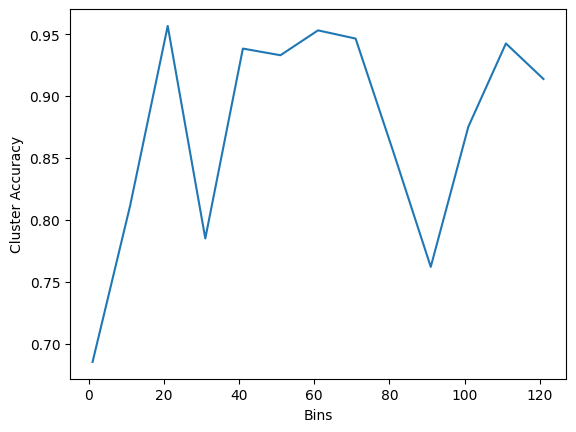

In [136]:
plt.plot(cuts_tailed.keys(), cuts_tailed.values())
plt.xlabel("Bins")
plt.ylabel("Cluster Accuracy")


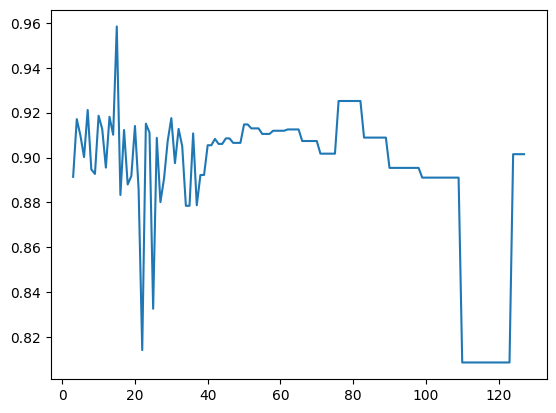

In [117]:
plt.plot(cuts2.keys(), cuts2.values())